# 0 - Mount Drive and Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Dataset

Mounted at /content/drive
/content/drive/MyDrive/Dataset


In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.manifold import TSNE


In [ ]:
# imports
import unicodedata
import re
import string

import spacy
nlp = spacy.load('en_core_web_sm')

from bs4 import BeautifulSoup

#import nltk
import nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.chunk import ne_chunk

In [ ]:
from nltk.stem import PorterStemmer


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

#1 - Import Data and Preliminary Information

##Bandcamp Album json prepping

In [ ]:
#store json files directory and columns I want to take in lists

import json
file_paths = [
    '/content/drive/MyDrive/Dataset/albums-full-info-1.json',
    '/content/drive/MyDrive/Dataset/albums-full-info-2.json',
    '/content/drive/MyDrive/Dataset/albums-full-info-3.json',
    '/content/drive/MyDrive/Dataset/albums-full-info-4.json',
    '/content/drive/MyDrive/Dataset/albums-full-info-5.json',
    '/content/drive/MyDrive/Dataset/albums-full-info-6.json',
    '/content/drive/MyDrive/Dataset/albums-full-info-7.json',
    '/content/drive/MyDrive/Dataset/albums-full-info-8.json',
    '/content/drive/MyDrive/Dataset/albums-full-info-9.json',
    '/content/drive/MyDrive/Dataset/albums-full-info-10.json',
    '/content/drive/MyDrive/Dataset/albums-full-info-11.json',

]
columns = ['_id', 'url', 'keywords', 'description']




In [ ]:
#function to load json files to dataframe
def load_json_files_to_dataframe(file_paths, columns):
    df_music = pd.DataFrame()

    for file_path in file_paths:
        with open(file_path, 'r') as f:
            json_str = f.read()
            data = json.loads(json_str)

        # Create a DataFrame from the JSON data and filter the desired columns
        temp_df = pd.read_json(data, orient ='columns')
        temp_df = temp_df[columns]

        # Append the temporary DataFrame to the main DataFrame
        df_music = df_music.append(temp_df, ignore_index=True)

    return df_music

In [ ]:
df_music = load_json_files_to_dataframe(file_paths, columns)
df_music.head()

_id  \
0  https://1985-music.bandcamp.com/album/about-yo...   
1  https://r-labelgroup.bandcamp.com/track/like-s...   
2  https://shadesxshades.bandcamp.com/album/sampl...   
3  https://progressive-future.bandcamp.com/track/...   
4  https://knightwerk.bandcamp.com/album/ultimeci...   

                                                 url  \
0                                                NaN   
1  https://r-labelgroup.bandcamp.com/track/like-s...   
2                                                NaN   
3  https://progressive-future.bandcamp.com/track/...   
4                                                NaN   

                                            keywords  \
0                              drum and bass, London   
1                                             Berlin   
2  Electronic, Experimental, Hip Hop, bass, bass ...   
3             Electronic, IDM, electro, techno, Kiev   
4  Dance, EDM, Electronic, House, Jersey Club, Mi...   

                                         description  
0                                                NaN  
1                                                NaN  
2  ***THIS IS A SAMPLE PACK. NOT AN ALBUM*** \r\n...  
3                                                NaN  
4  Following up his debut EP Sensi on NY-based la...

In [ ]:
df_music['url'] = df_music['url'].fillna(df_music['_id'])
df_music= df_music.drop(['_id'],axis = 1)
df_music.tail()

url  \
1069967  https://flaersmin.bandcamp.com/track/02-flaer-...   
1069968  https://ken-tanaka.bandcamp.com/album/toku-wo-...   
1069969  https://brunoblum.bandcamp.com/album/la-bombe-...   
1069970  https://newkanada.bandcamp.com/album/fables-an...   
1069971      https://alferox.bandcamp.com/track/iceolation   

                                                  keywords  \
1069967  Electronic, ambient, chill out, enigmatic, new...   
1069968  Alternative, electroacoustic, electronica, ind...   
1069969  Pop, indie rock, jazz, reggae, singer-songwrit...   
1069970  adam marshall, fables and fairytales, kuji, mu...   
1069971  Al Ferox, Electronic, acid techno, dancefloor ...   

                                               description  
1069967                               In Search Of... [EP]  
1069968                             Hyakkei 3rd Mini Album  
1069969  Cliquer sur la photo pour l'agrandir\r\n\r\nEn...  
1069970                                                NaN  
1069971                                                NaN

Noted that description has escape characters

## Import sales data

In [ ]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/1000000-bandcamp-sales.csv')
df.head()

Unnamed: 0                                                _id  \
0           0  1599688803.5175&//girlbanddublin.bandcamp.com/...   
1           1  1599688805.27838&//maharettarecords.bandcamp.c...   
2           2  1599688805.90646&//maharettarecords.bandcamp.c...   
3           3  1599688806.94234&//alicesitski.bandcamp.com/al...   
4           4  1599688809.07942&//linguaignota.bandcamp.com/t...   

                                       art_url item_type      utc_date  \
0  https://f4.bcbits.com/img/a0206405257_7.jpg         a  1.599689e+09   
1  https://f4.bcbits.com/img/a2984241552_7.jpg         a  1.599689e+09   
2  https://f4.bcbits.com/img/a3320494770_7.jpg         a  1.599689e+09   
3  https://f4.bcbits.com/img/0020476345_37.jpg         p  1.599689e+09   
4  https://f4.bcbits.com/img/a3428873396_7.jpg         t  1.599689e+09   

  country_code track_album_slug_text         country slug_type  \
0           gb                   NaN  United Kingdom         a   
1           fi                   NaN         Finland         a   
2           fi                   NaN         Finland         a   
3           gb                   NaN  United Kingdom         a   
4           us                   NaN   United States         t   

  amount_paid_fmt  ...  amount_paid releases     artist_name currency  \
0           $9.99  ...         9.99      NaN       Girl Band      USD   
1              £1  ...         1.00      NaN           Jirah      GBP   
2              £3  ...         3.00      NaN          D-Ther      GBP   
3          €10.50  ...        10.50      NaN  WHITE NOISE TV      EUR   
4              $1  ...         1.00      NaN   LINGUA IGNOTA      USD   

      album_title  amount_paid_usd package_image_id amount_over_fmt item_slug  \
0             NaN             9.99              NaN             NaN       NaN   
1             NaN             1.30              NaN             NaN       NaN   
2             NaN             3.90              NaN             NaN       NaN   
3  WHITE NOISE TV            12.39       20476345.0             NaN       NaN   
4             NaN             1.00              NaN             NaN       NaN   

   addl_count  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 24 columns]

In [ ]:
df.shape

(1000000, 24)

In [ ]:
df.describe()

Unnamed: 0      utc_date      item_price        art_id  \
count  1000000.000000  1.000000e+06  1000000.000000  7.645200e+05   
mean    499999.500000  1.600750e+09       15.475516  2.141628e+09   
std     288675.278932  6.049259e+05      121.719962  1.241930e+09   
min          0.000000  1.599689e+09        0.000000  2.018000e+04   
25%     249999.750000  1.600237e+09        1.000000  1.057849e+09   
50%     499999.500000  1.600778e+09        5.000000  2.137613e+09   
75%     749999.250000  1.601288e+09       10.000000  3.228946e+09   
max     999999.000000  1.601647e+09    29760.000000  4.294959e+09   

          amount_paid      releases  amount_paid_usd  package_image_id  \
count  1000000.000000  11584.000000   1000000.000000      2.327080e+05   
mean        17.899412     31.063536         8.931315      1.977005e+07   
std        143.261461     70.861927        12.490078      3.541261e+06   
min          0.200000      3.000000         0.200000      1.048130e+05   
25%          2.000000      5.000000         2.000000      1.958274e+07   
50%          5.600000     10.000000         6.000000      2.138429e+07   
75%         10.000000     22.000000        11.630000      2.166676e+07   
max      50000.000000   1078.000000      1286.260000      2.185090e+07   

         addl_count  
count  21742.000000  
mean       1.462147  
std        1.006632  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       22.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   _id                    1000000 non-null  object 
 2   art_url                1000000 non-null  object 
 3   item_type              1000000 non-null  object 
 4   utc_date               1000000 non-null  float64
 5   country_code           1000000 non-null  object 
 6   track_album_slug_text  2237 non-null     object 
 7   country                1000000 non-null  object 
 8   slug_type              988416 non-null   object 
 9   amount_paid_fmt        1000000 non-null  object 
 10  item_price             1000000 non-null  float64
 11  item_description       999994 non-null   object 
 12  art_id                 764520 non-null   float64
 13  url                    1000000 non-null  object 
 14  amount_paid        

## Merge dataframes and save

In [ ]:
def add_http(url):
    if url.startswith('https'):
        return url
    else:
        return 'https:' + url

df['url'] = df['url'].apply(add_http)
df_music['url']=df_music['url'].apply(add_http)

In [ ]:
df.head(10)

Unnamed: 0                                                _id  \
0           0  1599688803.5175&//girlbanddublin.bandcamp.com/...   
1           1  1599688805.27838&//maharettarecords.bandcamp.c...   
2           2  1599688805.90646&//maharettarecords.bandcamp.c...   
3           3  1599688806.94234&//alicesitski.bandcamp.com/al...   
4           4  1599688809.07942&//linguaignota.bandcamp.com/t...   
5           5  1599688812.69267&//sofiefatouretchi.bandcamp.c...   
6           6  1599688813.89375&//plexitofer.bandcamp.com/alb...   
7           7  1599688817.63138&//haroldbudd.bandcamp.com/alb...   
8           8  1599688823.53451&//favoriterecordings.bandcamp...   
9           9  1599688825.93404&//amandapalmer.bandcamp.com/t...   

                                       art_url item_type      utc_date  \
0  https://f4.bcbits.com/img/a0206405257_7.jpg         a  1.599689e+09   
1  https://f4.bcbits.com/img/a2984241552_7.jpg         a  1.599689e+09   
2  https://f4.bcbits.com/img/a3320494770_7.jpg         a  1.599689e+09   
3  https://f4.bcbits.com/img/0020476345_37.jpg         p  1.599689e+09   
4  https://f4.bcbits.com/img/a3428873396_7.jpg         t  1.599689e+09   
5  https://f4.bcbits.com/img/a0772371002_7.jpg         t  1.599689e+09   
6  https://f4.bcbits.com/img/a3245809273_7.jpg         a  1.599689e+09   
7  https://f4.bcbits.com/img/a1223607670_7.jpg         a  1.599689e+09   
8  https://f4.bcbits.com/img/a1858161280_7.jpg         t  1.599689e+09   
9  https://f4.bcbits.com/img/a2371143964_7.jpg         t  1.599689e+09   

  country_code track_album_slug_text         country slug_type  \
0           gb                   NaN  United Kingdom         a   
1           fi                   NaN         Finland         a   
2           fi                   NaN         Finland         a   
3           gb                   NaN  United Kingdom         a   
4           us                   NaN   United States         t   
5           us                   NaN   United States         t   
6           jp                   NaN           Japan         a   
7           de                   NaN         Germany         a   
8           ch                   NaN     Switzerland         t   
9           us                   NaN   United States         t   

  amount_paid_fmt  ...  amount_paid releases  \
0           $9.99  ...         9.99      NaN   
1              £1  ...         1.00      NaN   
2              £3  ...         3.00      NaN   
3          €10.50  ...        10.50      NaN   
4              $1  ...         1.00      NaN   
5           $1.29  ...         1.29      NaN   
6              $1  ...         1.00      NaN   
7              £5  ...         5.00      NaN   
8           €1.99  ...         1.99      NaN   
9              $1  ...         1.00      NaN   

                        artist_name currency  \
0                         Girl Band      USD   
1                             Jirah      GBP   
2                            D-Ther      GBP   
3                    WHITE NOISE TV      EUR   
4                     LINGUA IGNOTA      USD   
5                             Sofie      USD   
6                       Plexi Music      USD   
7                       Harold Budd      GBP   
8                           Djeneba      EUR   
9  Amanda Palmer & Rhiannon Giddens      USD   

                        album_title  amount_paid_usd package_image_id  \
0                               NaN             9.99              NaN   
1                               NaN             1.30              NaN   
2                               NaN             3.90              NaN   
3                    WHITE NOISE TV            12.39       20476345.0   
4                               NaN             1.00              NaN   
5                     Cult Survivor             1.29              NaN   
6                               NaN             1.00              NaN   
7                               NaN             6.50              NaN 

In [ ]:
#joining the sales dataframe with music dataframe based on url column
#merged_df = pd.merge(df,df_music)
merged_df = df.merge(df_music.drop_duplicates(subset=['url']), on='url', how='left')

merged_df.head()
merged_df.to_csv('/content/drive/MyDrive/Dataset/merged_dataset.csv')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   _id                    1000000 non-null  object 
 2   art_url                1000000 non-null  object 
 3   item_type              1000000 non-null  object 
 4   utc_date               1000000 non-null  float64
 5   country_code           1000000 non-null  object 
 6   track_album_slug_text  2237 non-null     object 
 7   country                1000000 non-null  object 
 8   slug_type              988416 non-null   object 
 9   amount_paid_fmt        1000000 non-null  object 
 10  item_price             1000000 non-null  float64
 11  item_description       999994 non-null   object 
 12  art_id                 764520 non-null   float64
 13  url                    1000000 non-null  object 
 14  amount_paid        

# 1B - reload merged dataframe (Resume)

In [ ]:
#reload merged_df

merged_df =pd.read_csv('/content/drive/MyDrive/Dataset/merged_dataset.csv')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0.1           1000000 non-null  int64  
 1   Unnamed: 0             1000000 non-null  int64  
 2   _id                    1000000 non-null  object 
 3   art_url                1000000 non-null  object 
 4   item_type              1000000 non-null  object 
 5   utc_date               1000000 non-null  float64
 6   country_code           1000000 non-null  object 
 7   track_album_slug_text  2237 non-null     object 
 8   country                1000000 non-null  object 
 9   slug_type              988416 non-null   object 
 10  amount_paid_fmt        1000000 non-null  object 
 11  item_price             1000000 non-null  float64
 12  item_description       999994 non-null   object 
 13  art_id                 764520 non-null   float64
 14  url                

In [ ]:
merged_df.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                 _id  \
0  1599688803.5175&//girlbanddublin.bandcamp.com/...   
1  1599688805.27838&//maharettarecords.bandcamp.c...   
2  1599688805.90646&//maharettarecords.bandcamp.c...   
3  1599688806.94234&//alicesitski.bandcamp.com/al...   
4  1599688809.07942&//linguaignota.bandcamp.com/t...   

                                       art_url item_type      utc_date  \
0  https://f4.bcbits.com/img/a0206405257_7.jpg         a  1.599689e+09   
1  https://f4.bcbits.com/img/a2984241552_7.jpg         a  1.599689e+09   
2  https://f4.bcbits.com/img/a3320494770_7.jpg         a  1.599689e+09   
3  https://f4.bcbits.com/img/0020476345_37.jpg         p  1.599689e+09   
4  https://f4.bcbits.com/img/a3428873396_7.jpg         t  1.599689e+09   

  country_code track_album_slug_text         country slug_type  ...  \
0           gb                   NaN  United Kingdom         a  ...   
1           fi                   NaN         Finland         a  ...   
2           fi                   NaN         Finland         a  ...   
3           gb                   NaN  United Kingdom         a  ...   
4           us                   NaN   United States         t  ...   

      artist_name  currency     album_title  amount_paid_usd package_image_id  \
0       Girl Band       USD             NaN             9.99              NaN   
1           Jirah       GBP             NaN             1.30              NaN   
2          D-Ther       GBP             NaN             3.90              NaN   
3  WHITE NOISE TV       EUR  WHITE NOISE TV            12.39       20476345.0   
4   LINGUA IGNOTA       USD             NaN             1.00              NaN   

   amount_over_fmt  item_slug addl_count  \
0              NaN        NaN        NaN   
1              NaN        NaN        NaN   
2              NaN        NaN        NaN   
3              NaN        NaN        NaN   
4              NaN        NaN        NaN   

                                            keywords  \
0             Alternative, noise, post-punk, Ireland   
1  Electronic, Psychedelic Trance, psytrance, London   
2  Electronic, Psychedelic Trance, psytrance, London   
3  Darkpop, EBM, Electro, Electronic, Synthpop, f...   
4           Experimental, retribution, United States   

                                         description  
0  In November 2019, Girl Band played back to bac...  
1                                                NaN  
2  Maharetta Records proudly presents 'The Last S...  
3           This is our debut album. made 2019-2020.  
4                                                NaN  

[5 rows x 27 columns]

## Column descriptions



Unnamed: 0 - Index column

_id - unique identifier containnig timestamp and item url

art_url - url to item artwork

item_type - type of item ('a' for digital albums, 'p' for physical item, 't' for individual tracks, 'b' for full digital discography)

utc_date - sales' timestamps

country_code - country code for where the purchase was made

track_album_slug_text - not sure, probably a description of item or message included in purchase

country - country where purchase was made

slug_type - also denotes type of item similar to item_type

item_price - price of item in seller's currency

item_description - name or description of item

art_id - id of artwork

url - link to the item

currency - buyer's currency

amount_paid - amount paid by buyer in buyer's currency

amount_paid_fmt - amount paid in the buyer's currency with currency symbol

amount_paid_usd - amount paid by buyer converted to usd

amount_over_fmt - amount voluntarily paid extra by buyer (in buyer's currency)

releases - number of releases bought when user buys the full discography (at a discount)

artist_name - artist name

album_title - title of album

package_image_id - id to image of item in case of physical item

item_slug - only has the value /album/ for some transactions involving individual tracks

addl_count - also appear whenever item_slug isn't null, possibly means buyer also buys additional tracks from that same album

keywords - music's descriptors as tags

# 2 - Cleaning Data

## Dropping Irrelevant Columns

In [ ]:
#Extra index column

merged_df = merged_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, errors='ignore')
#drop irrelevant columns

merged_df = merged_df.drop(['package_image_id', 'addl_count','track_album_slug_text','releases','art_url','art_id','item_slug','slug_type'], axis=1)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   _id               1000000 non-null  object 
 1   item_type         1000000 non-null  object 
 2   utc_date          1000000 non-null  float64
 3   country_code      1000000 non-null  object 
 4   country           1000000 non-null  object 
 5   amount_paid_fmt   1000000 non-null  object 
 6   item_price        1000000 non-null  float64
 7   item_description  999994 non-null   object 
 8   url               1000000 non-null  object 
 9   amount_paid       1000000 non-null  float64
 10  artist_name       999998 non-null   object 
 11  currency          1000000 non-null  object 
 12  album_title       356468 non-null   object 
 13  amount_paid_usd   1000000 non-null  float64
 14  amount_over_fmt   119133 non-null   object 
 15  keywords          834495 non-null   object 
 16  d

item description NaN can be dropped

album title can be filled with 'none' string

amount_over_fmt needs to be converted to USD and nan filled with 0

keywords and filled with 'none'

description can be filled with keywords if NaN, if no keywords then use none

keyword NaN can be filled with none

## Dealing with null values

In [ ]:
#if description is null, copy over keywords to description
merged_df['description'] = merged_df['description'].fillna('')
merged_df['description'] = merged_df.apply(lambda x: x['keywords'] if x['description']=='' else x['description'], axis=1)

#fill string columns with none and numerical with 0
values = {"item_description": 'none', "artist_name": 'none', "album_title": 'none', "keywords": 'none', 'amount_over_fmt' : 0}
merged_df.fillna(value=values, inplace=True)

In [ ]:
merged_df['description'] = merged_df['description'].fillna('none')


In [ ]:
#convert amount over column into float
merged_df['amount_over_fmt'] = merged_df['amount_over_fmt'].replace({'\$': '', ',': '', '\€' : '', '\£' : '', '\¥' : '', '\₪' : ''}, regex=True).astype(float)


#3 - Feature Engineering (Pt.1)

## Counts

In [ ]:
#average # of sales per day over the course of 23days is approximately 43478 sales

#gross revenue
gross_rev = merged_df['amount_paid_usd'].sum()

gross_rev

8931315.199999997

In [ ]:
def plot_frequency_tables(df, columns):
    for col in columns:
        # generate frequency counts for column
        counts = merged_df[col].value_counts()

        # create bar plot using Seaborn
        sns.barplot(x=counts.index, y=counts.values)

        # add axis labels and title
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'{col} Frequency')

        # show plot
        plt.show()

In [ ]:
def countplot(df, column, xlabel, ylabel):
  value_counts = merged_df[column].value_counts()
  value_counts = value_counts.nlargest(n=20, keep='first')
  plt.figure(figsize=(12, 10))

  ax = sns.barplot(x=value_counts.index, y=value_counts.values)
  ax.set(ylabel=ylabel)
  plt.xticks(rotation=45, horizontalalignment='right')
  #ax.set_yscale('log')

  for i, v in enumerate(value_counts.values):
    if v < 200000:
      ax.text(i, v *1.1 , str(v), color='black', ha='center')
    else:
      ax.text(i, v * 0.2, str(v), color='black', ha='center')


  plt.title(xlabel)

  plt.show()

In [ ]:
counts = merged_df['country'].value_counts().nlargest(30)

counts = counts.rename_axis('Country').reset_index(name='Frequency')
counts['Frequency'] = counts['Frequency'].map('{:,}'.format)


print(counts)

               Country Frequency
0        United States   398,999
1       United Kingdom   149,124
2              Germany    86,589
3            Australia    55,761
4               Canada    42,451
5               France    39,250
6                Japan    32,544
7          Netherlands    17,106
8          Switzerland    16,214
9                Spain    11,784
10               Italy    11,780
11             Belgium    10,842
12  Russian Federation     9,325
13             Ireland     9,021
14              Sweden     8,953
15         New Zealand     7,680
16              Poland     7,390
17             Finland     6,683
18              Norway     5,908
19             Austria     5,772
20              Greece     5,131
21             Denmark     4,966
22              Mexico     3,645
23              Israel     3,388
24      Czech Republic     3,264
25   Republic of Korea     2,864
26            Portugal     2,818
27             Romania     2,503
28              Brazil     2,312
29        

## Adding datetime, day of week and date Columns

In [ ]:
#df2 = df.copy()
#df2.shape

In [ ]:
merged_df['date'] = pd.to_datetime(merged_df['utc_date'], unit='s').dt.date
merged_df['day_of_week'] = pd.to_datetime(merged_df['utc_date'],unit='s').dt.day_name()

## Add item_price_usd column

#### Forex Convert

In [ ]:
price_convert_df = merged_df[['item_price','currency','utc_date']].copy()

In [ ]:
price_convert_df['utc_date'] = pd.to_datetime(merged_df['utc_date'], unit='s').dt.date

#### Conversion

In [ ]:
!pip install forex_python
from forex_python.converter import CurrencyRates

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 7.3 MB/s eta 0:00:00


In [ ]:
c = CurrencyRates()

c.get_rates('USD')
c = CurrencyRates()


In [ ]:
price_convert_df['date'] = pd.to_datetime(price_convert_df['utc_date'])


In [ ]:
unique_values = price_convert_df['currency'].unique()

#make a new sample df with first entry of each unique date
price_convert_df_sample = price_convert_df[price_convert_df['item_price']> 0].drop_duplicates(subset=['date', 'currency'])



In [ ]:

#make a new sample df with first entry of each unique date
#price_convert_df_sample = price_convert_df[price_convert_df['item_price']> 0].groupby('date').first().reset_index()


price_convert_df_sample['price_USD'] = price_convert_df_sample.apply( lambda x: c.convert( x.currency ,'USD', x.item_price, x.date), axis = 1)
price_convert_df_sample['exchangerate'] = price_convert_df_sample['price_USD'] / price_convert_df_sample['item_price']


KeyboardInterrupt: ignored

In [ ]:
price_convert_df_sample.tail()

In [ ]:
price_convert_df_sample_final =  price_convert_df_sample[['currency', 'date', 'exchangerate']]

#export out dataframe as backup
price_convert_df_sample_final.to_csv('/content/drive/MyDrive/Dataset/price_convert_df_sample.csv')

#### Continue from after forex convert

In [ ]:
price_convert_df_sample_final =pd.read_csv('/content/drive/MyDrive/Dataset/price_convert_df_sample.csv', index_col=[0])

In [ ]:
#merge dataframes based on date and currency column

merged_df['date'] = pd.to_datetime(merged_df['date'])
price_convert_df_sample_final['date'] = pd.to_datetime(price_convert_df_sample_final['date'])


merged_df_price = pd.merge(merged_df, price_convert_df_sample_final,  on = ['date', 'currency'], how = 'left')

merged_df_price.head(30)

_id item_type      utc_date  \
0   1599688803.5175&//girlbanddublin.bandcamp.com/...         a  1.599689e+09   
1   1599688805.27838&//maharettarecords.bandcamp.c...         a  1.599689e+09   
2   1599688805.90646&//maharettarecords.bandcamp.c...         a  1.599689e+09   
3   1599688806.94234&//alicesitski.bandcamp.com/al...         p  1.599689e+09   
4   1599688809.07942&//linguaignota.bandcamp.com/t...         t  1.599689e+09   
5   1599688812.69267&//sofiefatouretchi.bandcamp.c...         t  1.599689e+09   
6   1599688813.89375&//plexitofer.bandcamp.com/alb...         a  1.599689e+09   
7   1599688817.63138&//haroldbudd.bandcamp.com/alb...         a  1.599689e+09   
8   1599688823.53451&//favoriterecordings.bandcamp...         t  1.599689e+09   
9   1599688825.93404&//amandapalmer.bandcamp.com/t...         t  1.599689e+09   
10  1599688835.15601&//thecaptaincreolecollection....         a  1.599689e+09   
11  1599688836.80575&//linguaignota.bandcamp.com/t...         t  1.599689e+09   
12  1599688836.87656&//linguaignota.bandcamp.com/t...         t  1.599689e+09   
13  1599688837.10089&//cookinsoul.bandcamp.com/alb...         a  1.599689e+09   
14  1599688845.11123&//kindischoffical.bandcamp.co...         a  1.599689e+09   
15  1599688845.11818&//stephenpaultaylor.bandcamp....         t  1.599689e+09   
16  1599688845.66974&//kindischoffical.bandcamp.co...         t  1.599689e+09   
17  1599688848.21811&//darcie.bandcamp.com/track/s...         t  1.599689e+09   
18  1599688852.06918&//shellarecords.bandcamp.com/...         a  1.599689e+09   
19  1599688865.13856&//unreqvited-northernsilence....         p  1.599689e+09   
20  1599688868.46945&//plushorganics.bandcamp.com/...         a  1.599689e+09   
21  1599688869.06688&//flasherdc.bandcamp.com/albu...         a  1.599689e+09   
22  1599688869.28855&//flasherdc.bandcamp.com/albu...         a  1.599689e+09   
23  1599688870.0492&//boxbedroomrebels.bandcamp.co...         p  1.599689e+09   
24  1599688871.02832&//bcee.bandcamp.com/album/lif...         p  1.599689e+09   
25  1599688875.25304&//fatigo.bandcamp.com/track/u...         t  1.599689e+09   
26  1599688875.84356&//briangrainger.bandcamp.com/...         p  1.599689e+09   
27  1599688875.89556&//blaublauband.bandcamp.com/a...         a  1.599689e+09   
28   1599688876.4084&//mogwai.bandcamp.com/album/2018         a  1.599689e+09   
29  1599688883.61376&//tvgirl.bandcamp.com/album/f...         p  1.599689e+09   

   country_code         country amount_paid_fmt  item_price  \
0            gb  United Kingdom           $9.99        9.99   
1            fi         Finland              £1        1.00   
2            fi         Finland              £3        3.00   
3            gb  United Kingdom          €10.50       10.50   
4            us   United States              $1        1.00   
5            us   United States           $1.29        1.29   
6            jp           Japan              $1        0.00   
7            de         Germany              £5        5.00   
8            ch     Switzerland           €1.99        1.99   
9            us   United States              $1        1.00   
10           gb  United Kingdom              £7        7.00   
11           us   United States              $1        1.00   
12           us   United States           $2.99        2.99   
13           us   United States              €7        5.00   
14           ca          Canada              €2        1.98   
15           us   United States           €1.69        1.00   
16           ca          Canada              €1        1.98   
17           gb  United Kingdom              £1        1.00   
18           ca          Canada             $10        4.00   
19           fr          France          €13.90       13.90   
20           gb  United Kingdom              $2        2.00   
21           us   United States              $2        2.00   
22           us   United States              $7        7.00   
23           gb  United Ki

In [ ]:
price_convert_df_test = merged_df_price[merged_df_price['exchangerate'].isnull()]
merged_df_price.fillna(value = 1.0 , inplace = True)

merged_df_price['price_USD'] = merged_df_price['exchangerate'] * merged_df_price['item_price']


## Add Generous and Bandcamp Friday column (Y/N)

In [ ]:
merged_df_price['generous'] = merged_df_price['amount_over_fmt'].apply(lambda x: 1 if x >= 1 else 0)
merged_df_price['isBCFriday'] = merged_df_price['day_of_week'].apply(lambda x: 1 if x == 'Friday' else 0)

## Process Text Data

### Functions for Preprocessing

In [ ]:
#Preprocess functions aim at reducing noise
#preliminary text cleanup function to remove html and url and email
#def clean_text(text):
    # remove url
    #text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', "", text, flags=re.MULTILINE)
    # Remove email id:
    #text = re.sub(r'\S*@\S*\s?','',text)
    #return text
# function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text
# function to lowercase text
def lowercase_text(text):
    return text.lower()
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
    return re.sub(pat, '', text)
# function to remove escape characters
def remove_spaces(text):
    text = text.replace("\t", "").replace("\r", "").replace("\n", "")
    #text = re.sub('\s{2,}', '', text)
    return text
# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text

#preprocess step 1 function
def preprocessInitial(text):
  text = remove_spaces(text)
  #text = clean_text(text)
  text = remove_special_characters(text)
  text = lowercase_text(text)
  text = remove_accented_chars(text)
  text = remove_punctuation(text)
  return text

### Further PreProcessing: Tokenization/Lemming/Stemming/Normalization

In [ ]:
#Part 2 function for extracting meaningful words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocessTokenize(text):

    final_string = ""

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    stemmer = SnowballStemmer(language = 'english')
    text_stemmed = [stemmer.stem(y) for y in text_filtered]

    final_string = ' '.join(text_stemmed)

    return final_string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Clean Text

#### Clean Text and save to csv

In [ ]:
#remove url
merged_df['cleaned_description'] = merged_df['description'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#clean the text data
merged_df['cleaned_description'] =merged_df['cleaned_description'].apply(lambda x : preprocessInitial(x))
merged_df['cleaned_keywords'] =merged_df['keywords'].apply(lambda x : preprocessInitial(x))
merged_df['cleaned_item_description'] =merged_df['item_description'].apply(lambda x : preprocessInitial(x))

In [ ]:
clean_text_df = merged_df[['cleaned_item_description', 'cleaned_keywords', 'cleaned_description']].copy()


In [ ]:
#Tokenize words
clean_text_df['token_description'] =clean_text_df['cleaned_description'].apply(lambda x : preprocessTokenize(x))
clean_text_df['token_keywords'] =clean_text_df['cleaned_keywords'].apply(lambda x : preprocessTokenize(x))
clean_text_df['token_item_description'] =clean_text_df['cleaned_item_description'].apply(lambda x : preprocessTokenize(x))

clean_text_df.to_csv('/content/drive/MyDrive/Dataset/clean_text_df.csv')
clean_text_df.head(20)

#### Continue from csv

In [ ]:
clean_text_df = pd.read_csv('/content/drive/MyDrive/Dataset/clean_text_df.csv', index_col=[0])

In [ ]:
generous = merged_df_price['generous']
item_type = merged_df_price['item_type']

clean_text_df = pd.concat([clean_text_df,generous], axis = 1)
clean_text_df = pd.concat([clean_text_df,item_type], axis = 1)
clean_text_df.head()

cleaned_item_description  \
0              live at vicar street   
1                          neurogen   
2             the last snare bender   
3      limited edition compact disc   
4  o ruthless great divine director   

                                    cleaned_keywords  \
0                 alternative noise postpunk ireland   
1     electronic psychedelic trance psytrance london   
2     electronic psychedelic trance psytrance london   
3  darkpop ebm electro electronic synthpop future...   
4             experimental retribution united states   

                                 cleaned_description  \
0  in november 2019 girl band played back to back...   
1     electronic psychedelic trance psytrance london   
2  maharetta records proudly presents the last sn...   
3              this is our debut album made 20192020   
4             experimental retribution united states   

                                   token_description  \
0  novemb  girl band play back back sold show dub...   
1           electron psychedel tranc psytranc london   
2  maharetta record proud present last snare bend...   
3                                  debut album made    
4                     experiment retribut unit state   

                                      token_keywords  \
0                       altern nois postpunk ireland   
1           electron psychedel tranc psytranc london   
2           electron psychedel tranc psytranc london   
3  darkpop ebm electro electron synthpop futurepo...   
4                     experiment retribut unit state   

          token_item_description  generous item_type  
0              live vicar street         0         a  
1                       neurogen         0         a  
2              last snare bender         0         a  
3        limit edit compact disc         0         p  
4  ruthless great divin director         0         t

### Keywords visualization

In [ ]:
from collections import Counter
from wordcloud import WordCloud

In [ ]:
#clean_text_df['cleaned_description'] = merged_df['keywords'].str.lower().str.strip().str.replace('\s+', ' ', regex=True)
clean_text_df['keywords_list'] = clean_text_df['cleaned_keywords'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

keywords_counter_Gen = Counter()
keywords_counter_notGen = Counter()
for keywords in clean_text_df['keywords_list']:
    keywords_counter_Gen.update(keywords)


In [ ]:
useless_words = nltk.corpus.stopwords.words("english")
useless_words += ['none']


#### Word Clouds

In [ ]:
#function that takes the dataframe and combine all tokens together
def fullToken(df, column):
    words = ""
    for i in df[column]:
        val = str(i)
        tokens = val.split()
        words += " ".join(tokens)+" "
    return words

#function that plots wordcloud
def plot_wordcloud(df, column):
    stopwords = useless_words
    words = fullToken(df,column)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    min_font_size = 10,collocations=False).generate(words)
    # plot the WordCloud image
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [ ]:
keywords_gen = fullToken(clean_text_df[clean_text_df['generous']== 1], 'cleaned_keywords')
keywords_notGen = fullToken(clean_text_df[clean_text_df['generous']== 0], 'cleaned_keywords')

keywords_full = fullToken(clean_text_df, 'cleaned_keywords')

keywords_gen_counts = Counter(keywords_gen.split())
keywords_notGen_counts = Counter(keywords_notGen.split())

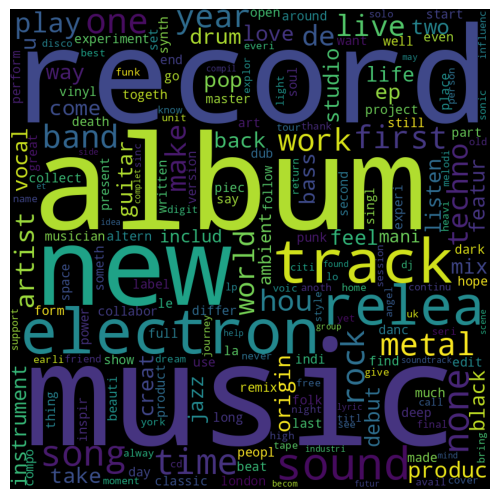

In [ ]:
plot_wordcloud(clean_text_df, 'token_description')

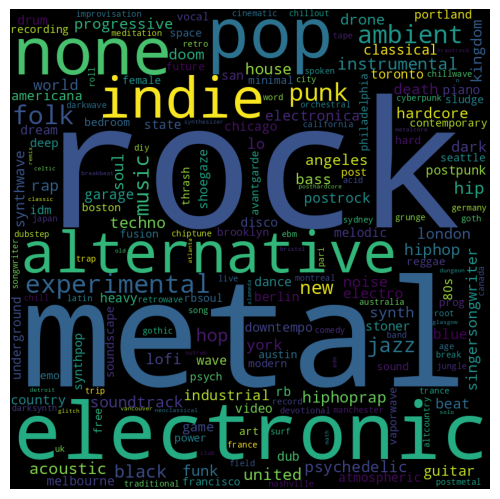

In [ ]:
plot_wordcloud(clean_text_df[clean_text_df['generous']== 1], 'cleaned_keywords')

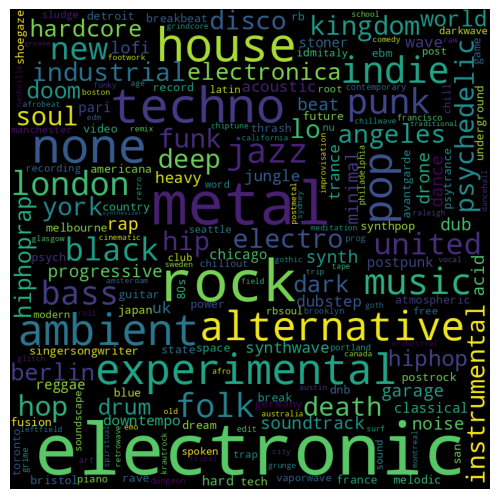

In [ ]:
plot_wordcloud(clean_text_df[clean_text_df['generous']== 0], 'cleaned_keywords')

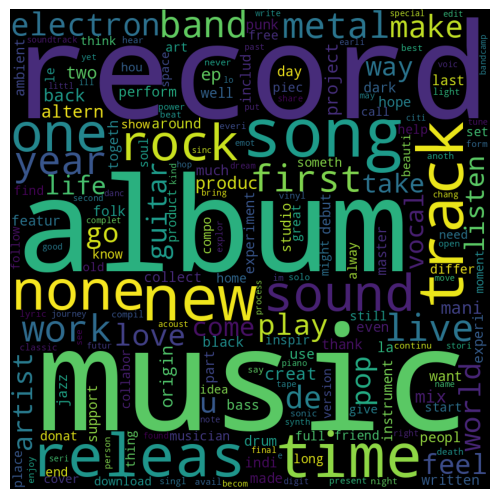

In [ ]:
plot_wordcloud(clean_text_df[clean_text_df['generous']== 1], 'token_description')

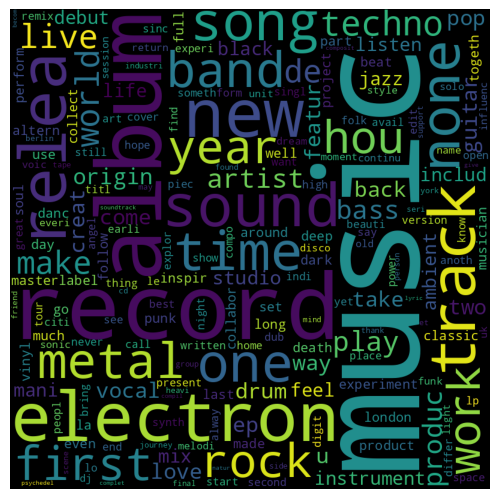

In [ ]:
plot_wordcloud(clean_text_df[clean_text_df['generous']== 0], 'token_description')

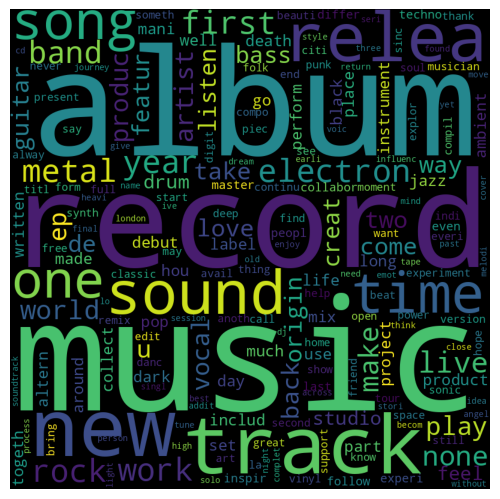

In [ ]:
plot_wordcloud(clean_text_df[clean_text_df['item_type']== 'a'], 'token_description')

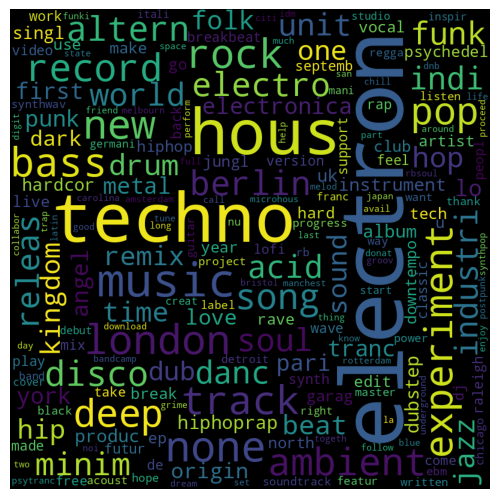

In [ ]:
plot_wordcloud(clean_text_df[clean_text_df['item_type']== 't'], 'token_description')

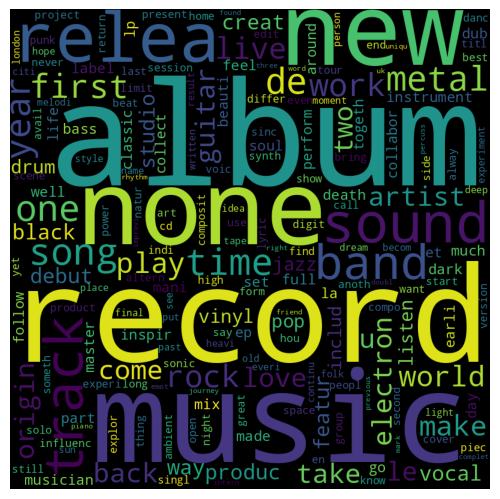

In [ ]:
plot_wordcloud(clean_text_df[clean_text_df['item_type']== 'p'], 'token_description')

# 4 - Plots

### Time Series plot of sales over time

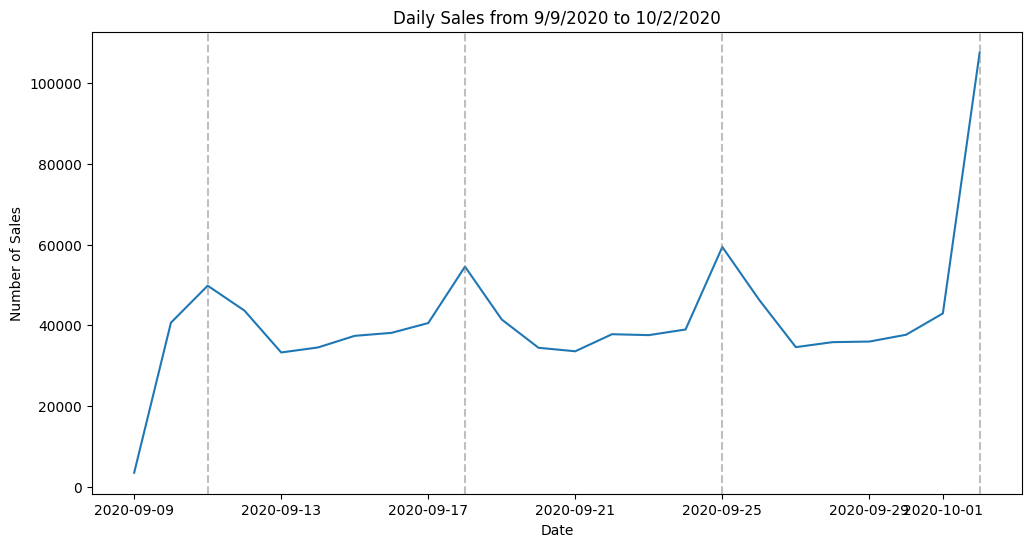

In [ ]:
# Convert 'utc_date' column to datetime format
df2['utc_date'] = pd.to_datetime(df['utc_date'], unit= 's')
df2['day_of_week'] = df2['utc_date'].dt.day_name()
daily_sales = df2.groupby(pd.Grouper(key='utc_date', freq='D'))['amount_paid'].count()
df2.set_index('utc_date', inplace=True)

plt.figure(figsize=(12, 6))

sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Number of Sales')
for i, date in enumerate(daily_sales.index):
    if date.day_name() == 'Friday':
        plt.axvline(date, color='grey', linestyle='--', alpha=0.5)

plt.title('Daily Sales from 9/9/2020 to 10/2/2020')

plt.show()


### Boxplots

<Axes: xlabel='price_USD'>

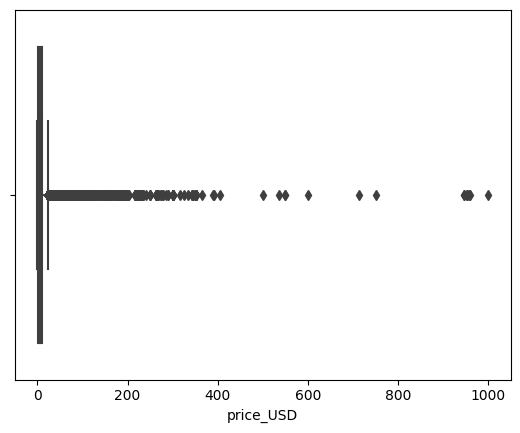

In [ ]:
sns.boxplot(data=merged_df_price, x="price_USD")


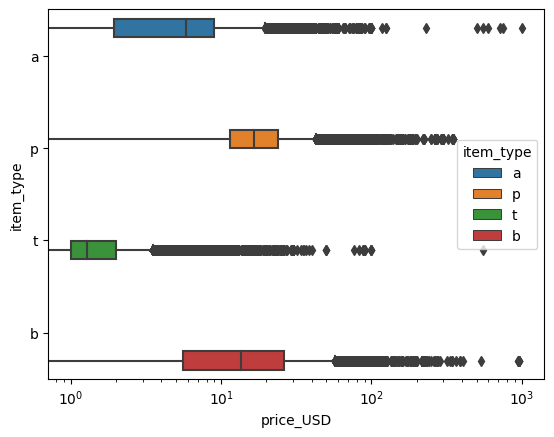

In [ ]:
sns.boxplot(data=merged_df_price, x="price_USD", y="item_type", hue="item_type")
plt.xscale('log')


In [ ]:
merged_df_price.describe()

utc_date      item_price     amount_paid  amount_paid_usd  \
count  1.000000e+06  1000000.000000  1000000.000000   1000000.000000   
mean   1.600750e+09       15.475516       17.899412         8.931315   
std    6.049259e+05      121.719962      143.261461        12.490078   
min    1.599689e+09        0.000000        0.200000         0.200000   
25%    1.600237e+09        1.000000        2.000000         2.000000   
50%    1.600778e+09        5.000000        5.600000         6.000000   
75%    1.601288e+09       10.000000       10.000000        11.630000   
max    1.601647e+09    29760.000000    50000.000000      1286.260000   

       amount_over_fmt    exchangerate       price_USD        generous  \
count   1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean          2.189302        1.071314        7.955865        0.119133   
std          71.489983        0.207465       10.518956        0.323945   
min           0.000000        0.003195        0.000000        0.000000   
25%           0.000000        1.000000        1.288209        0.000000   
50%           0.000000        1.000000        5.077116        0.000000   
75%           0.000000        1.185400       10.000000        0.000000   
max       50000.000000        1.298251     1000.000000        1.000000   

           isBCFriday  
count  1000000.000000  
mean         0.271231  
std          0.444595  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max          1.000000

### Generosity / BC Friday distribution in data

<Axes: xlabel='generous', ylabel='count'>

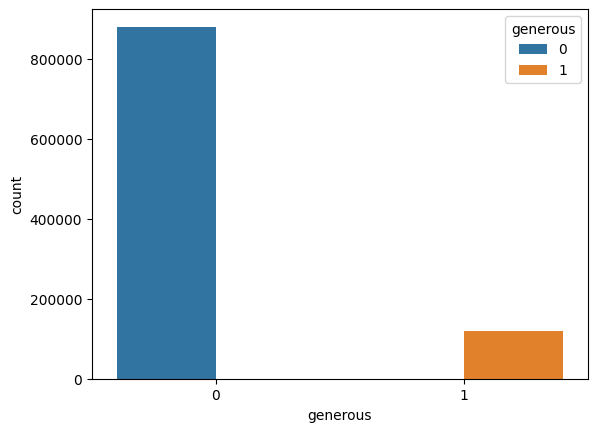

In [ ]:
sns.countplot(data=merged_df_price, x="generous", hue='generous')


<Axes: xlabel='isBCFriday', ylabel='count'>

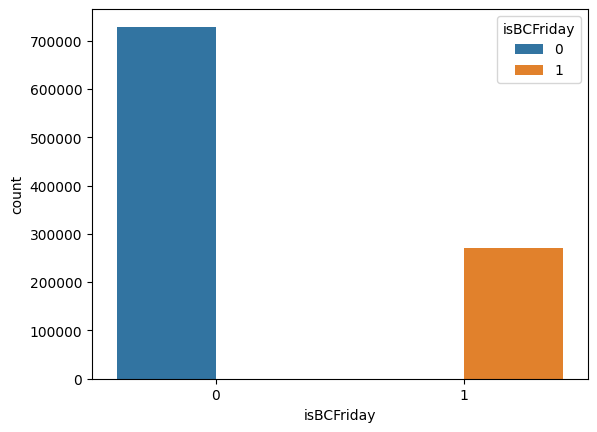

In [ ]:
sns.countplot(data=merged_df_price, x="isBCFriday", hue='isBCFriday')


<Axes: xlabel='generous', ylabel='count'>

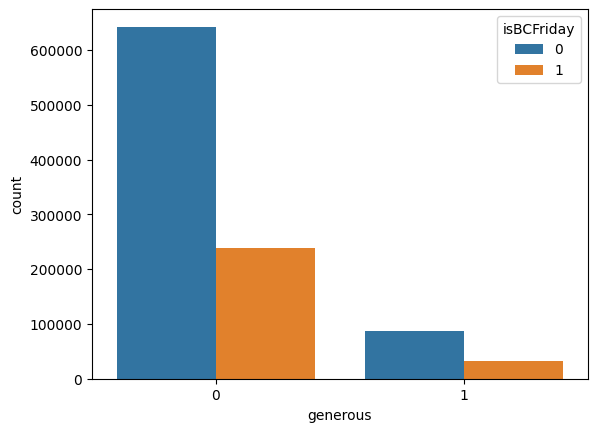

In [ ]:
sns.countplot(data=merged_df_price, x="generous", hue='isBCFriday')


### Sales by Item Types

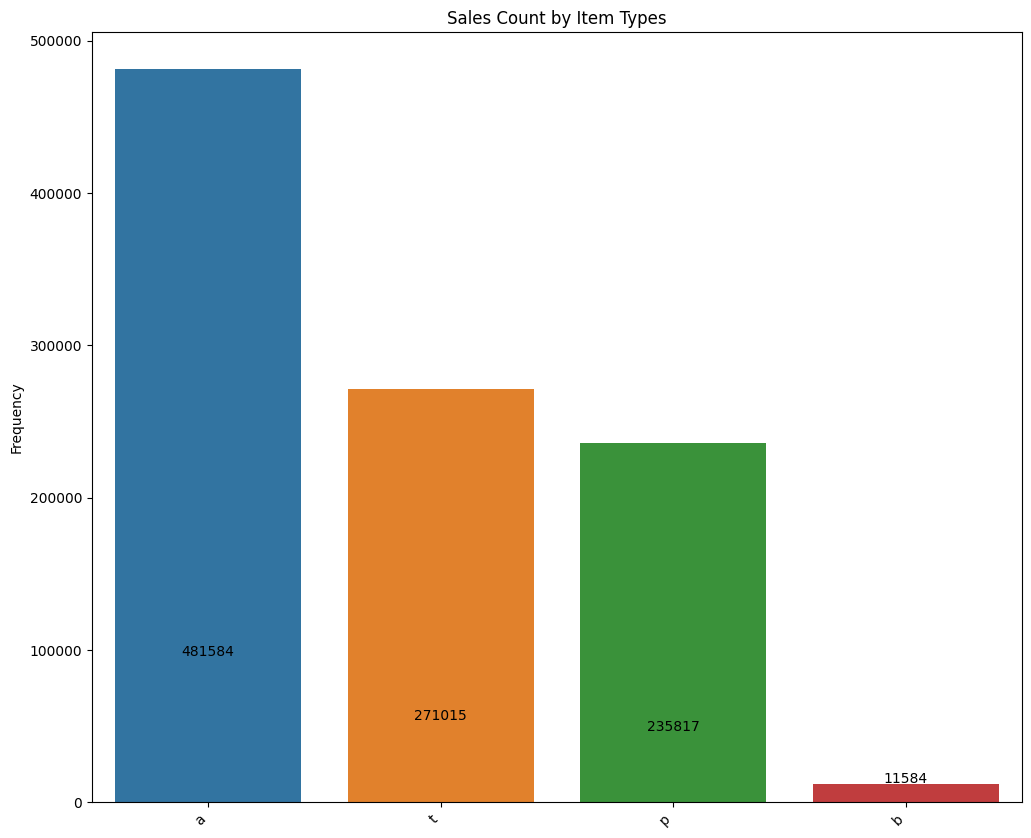

In [ ]:
#columns = ['item_type','country']
#plot_frequency_tables(df,columns)

countplot(merged_df, 'item_type', 'Sales Count by Item Types', 'Frequency')

### Top 20 countries with highest sales

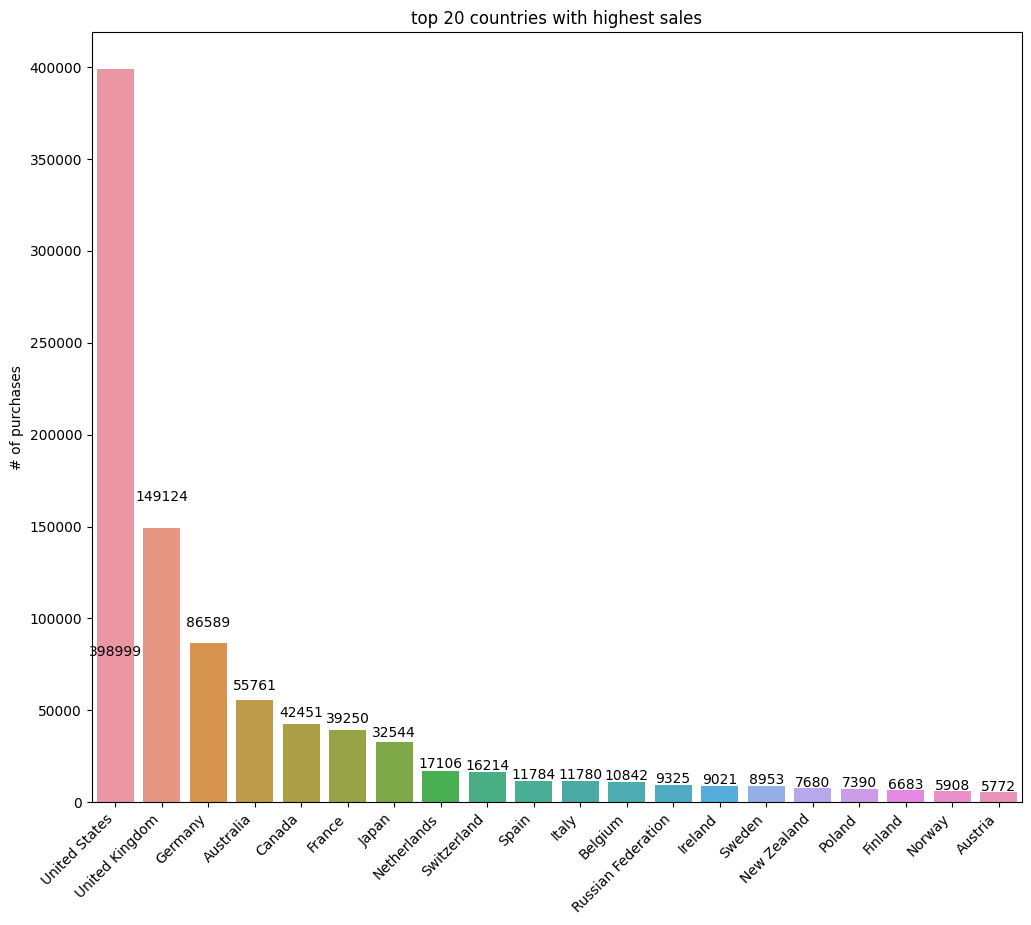

In [ ]:
countplot(merged_df, 'country', 'top 20 countries with highest sales', '# of purchases')

### Frequency of Item Price Being 0 vs. Item Price Being Greater Than 0

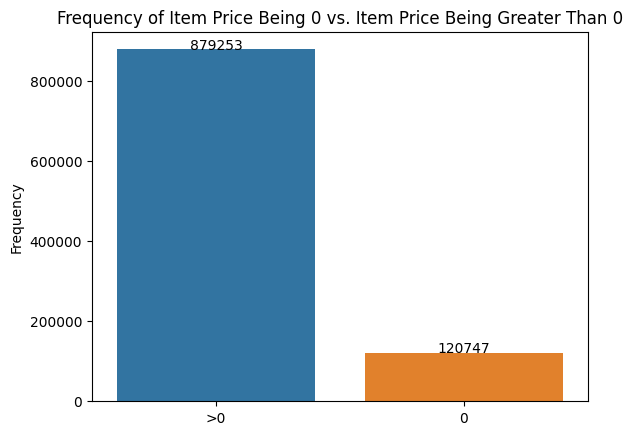

In [ ]:
# Examine frequency of when item is priced at 0
merged_df['price_category'] = merged_df['item_price'].apply(lambda x: '0' if x == 0 else '>0')
price_counts = merged_df['price_category'].value_counts()

ax = sns.barplot(x=price_counts.index, y=price_counts.values)
ax.set(ylabel='Frequency')
for i, v in enumerate(price_counts.values):
    ax.text(i, v + 1000, str(v), color='black', ha='center')

plt.title('Frequency of Item Price Being 0 vs. Item Price Being Greater Than 0')

plt.show()


### Sales volume each day of the week

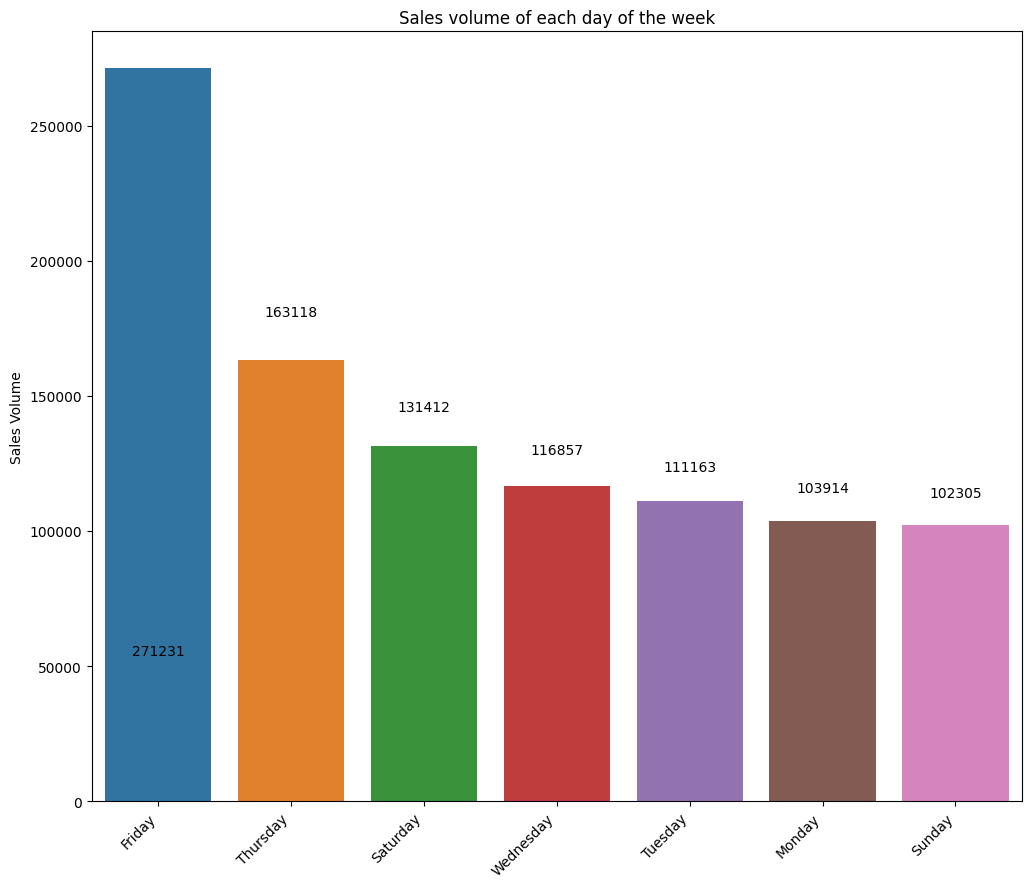

In [ ]:
countplot(merged_df, 'day_of_week', 'Sales volume of each day of the week', 'Sales Volume')

### Compare Average Amount paid vs. Item Type

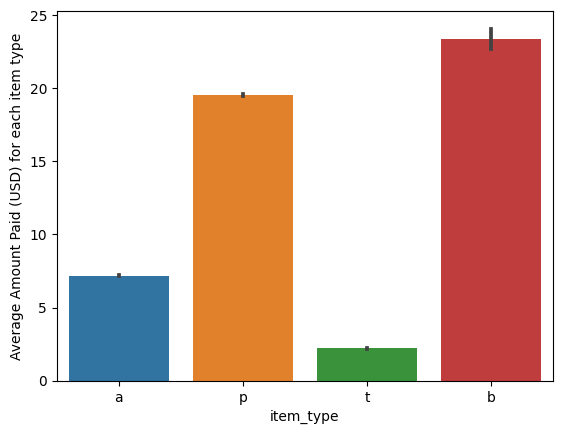

In [ ]:
sns.barplot(x='item_type', y='amount_paid_usd', data=merged_df, estimator=np.mean)
plt.ylabel('Average Amount Paid (USD) for each item type')
plt.show()

In [ ]:
merged_df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   _id               1000000 non-null  object        
 1   item_type         1000000 non-null  object        
 2   utc_date          1000000 non-null  float64       
 3   country_code      1000000 non-null  object        
 4   country           1000000 non-null  object        
 5   amount_paid_fmt   1000000 non-null  object        
 6   item_price        1000000 non-null  float64       
 7   item_description  1000000 non-null  object        
 8   url               1000000 non-null  object        
 9   amount_paid       1000000 non-null  float64       
 10  artist_name       1000000 non-null  object        
 11  currency          1000000 non-null  object        
 12  album_title       1000000 non-null  object        
 13  amount_paid_usd   1000000 non-null  float64

TODO - 1 hot encode item types
cluster the text descriptions then make those into categories of items content-wise

normalize data

drop (for feeding into clustering): utc_date, url, item_price, exchangerate, day_of_week, date, amount_over_fmt, currency, amount_paid,


# 5 - Clustering of Text Data

references https://www.kaggle.com/code/thykhuely/mercari-interactive-eda-topic-modelling#Text-Processing---Item-Description

## TF-IDF

In [ ]:
# masking number function
def mask_numbers(text):
    return re.sub(r'\b[0-9][0-9.,-]*\b', 'NUMBER-SPECIAL-TOKEN', text)

In [ ]:
#def identity_tokenizer(text):
#    return text

from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(lowercase = True, min_df=5, stop_words='english', ngram_range = (1,2))
                             #,token_pattern=r'(?u)\b[A-Za-z]+\b')

In [ ]:
#token_item_description = clean_text_df['cleaned_description'].fillna(value ='')

#try using tags instead of full description text
token_item_description = clean_text_df['cleaned_keywords'].fillna(value ='').drop_duplicates()

#token_item_description = clean_text_df['cleaned_keywords'].fillna(value ='')

In [ ]:
vz = vectorizer.fit_transform(token_item_description.apply(mask_numbers))


In [ ]:
tfidf = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [ ]:
vectorizer.get_feature_names_out()

array(['00s', '100bpm', '100hz', ..., 'zz', 'zzk', 'zzk quito'],
      dtype=object)

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending= True).tail(30)


tfidf
suny                     11.341995
free french              11.341995
blues deep               11.341995
blues dixieland          11.341995
free drum                11.341995
punk nwobhm              11.341995
noise florence           11.341995
noise free               11.341995
blues electroacoustic    11.341995
punk nwobhc              11.341995
dwarves garage           11.341995
punk nottingham          11.341995
noise horror             11.341995
sungaterecords           11.341995
punk nerd                11.341995
summer tropical          11.341995
fraunhofer diffraction   11.341995
freak jazz               11.341995
summery                  11.341995
country gothicamericana  11.341995
summer summertime        11.341995
sun city                 11.341995
noise iowa               11.341995
noise indie              11.341995
frecklefunk              11.341995
sundowner                11.341995
roxy music               11.341995
noise illbient           11.341995
freak pop                11.341995
devolver                 11.341995

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending= True).head(10)


tfidf
electronic    1.964785
rock          2.587887
experimental  2.826771
ambient       2.963719
alternative   3.054089
pop           3.095911
techno        3.114397
metal         3.154325
house         3.197606
music         3.235028

## T-SNE

In [ ]:
#sample the dataset
clean_text_df_sample = clean_text_df.sample(n=80000)
vz_sample = vectorizer.fit_transform(list(clean_text_df_sample['cleaned_description'].fillna(value = '')))

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_comp=50
svd = TruncatedSVD(n_components=n_comp, random_state=1)
svd_tfidf = svd.fit_transform(vz_sample)

In [ ]:
#t-sne after SVD

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)

In [ ]:
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 80000 samples in 0.003s...
[t-SNE] Computed neighbors for 80000 samples in 3.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 80000
[t-SNE] Computed conditional probabilities for sample 2000 / 80000
[t-SNE] Computed conditional probabilities for sample 3000 / 80000
[t-SNE] Computed conditional probabilities for sample 4000 / 80000
[t-SNE] Computed conditional probabilities for sample 5000 / 80000
[t-SNE] Computed conditional probabilities for sample 6000 / 80000
[t-SNE] Computed conditional probabilities for sample 7000 / 80000
[t-SNE] Computed conditional probabilities for sample 8000 / 80000
[t-SNE] Computed conditional probabilities for sample 9000 / 80000
[t-SNE] Computed conditional probabilities for sample 10000 / 80000
[t-SNE] Computed conditional probabilities for sample 11000 / 80000
[t-SNE] Computed conditional probabilities for sample 12000 / 80000
[t-SNE] Computed conditional probabilities for sam

In [ ]:
clean_text_df_sample.reset_index(inplace=True, drop=True)


In [ ]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
tfidf_df['description'] = clean_text_df_sample['cleaned_description']
tfidf_df['cleaned_keywords'] = clean_text_df_sample['cleaned_keywords']
tfidf_df['item_type'] = clean_text_df_sample['item_type']
tfidf_df['generous'] = clean_text_df_sample['generous']

## Fit K-Means for Text Data with weights from TF-IDF

### Functions in examining text clusters

References https://www.kaggle.com/code/jbencina/clustering-documents-with-tfidf-and-kmeans

In [ ]:
#finding using elbow method
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)

    sse = []
    for k in iters:
        sse.append(KMeans(init='k-means++', n_clusters = k, n_init=30).fit(data).inertia_)
        print('Fit {} clusters'.format(k))

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

In [ ]:
#plot pca plot and tsne plot
from sklearn.decomposition import PCA
import matplotlib.cm as cm

def plot_tsne_pca(data, labels, n_components):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=10000, replace=False)

    pca = PCA(n_components=2).fit_transform(data[max_items,:])
    tsne = TSNE().fit_transform(PCA(n_components=n_components).fit_transform(data[max_items,:]))


    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

    f, ax = plt.subplots(1, 2, figsize=(14, 6))

    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')

    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')



In [ ]:
def plot_tsne_pca_full(data, labels, n_components):
    max_label = max(labels)
    max_items = len(labels)

    pca = PCA(n_components=2).fit_transform(data)
    tsne = TSNE().fit_transform(PCA(n_components=n_components).fit_transform(data))


    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

    f, ax = plt.subplots(1, 2, figsize=(14, 6))

    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')

    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

In [ ]:
def plot_tsne_pca_full2(data, labels, n_components):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=100000, replace=False)

    pca = PCA(n_components=2).fit_transform(data[max_items,:])
    tsne = TSNE().fit_transform(PCA(n_components=n_components).fit_transform(data[max_items,:]))


    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

    f, ax = plt.subplots(1, 2, figsize=(14, 6))

    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')

    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data).groupby(clusters).mean()

    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

def plot_wordcloud_cluster(df, clusters, labels):
    stopwords = useless_words
    words = fullToken(df,column)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    min_font_size = 10,collocations=False).generate(words)
    # plot the WordCloud image
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

### Determine K for text data

In [ ]:
svd = TruncatedSVD(n_components=n_comp, random_state=1)
svd_tfidf = svd.fit_transform(vz)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


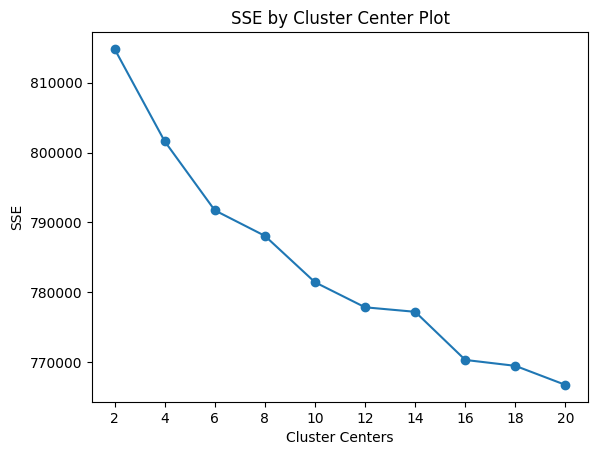

In [ ]:
find_optimal_clusters(vz, 20)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


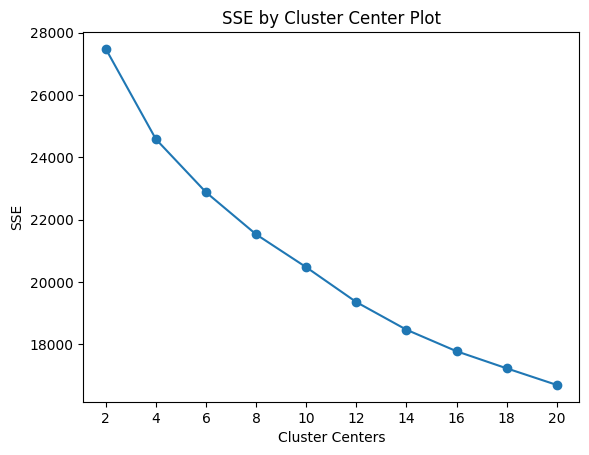

In [ ]:
#Elbow method
find_optimal_clusters(svd_tfidf, 20)

In [ ]:
#clusters = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=20).fit_predict(svd_tfidf)

clusters = KMeans(init='k-means++', n_clusters = 16, n_init=30).fit_predict(svd_tfidf)

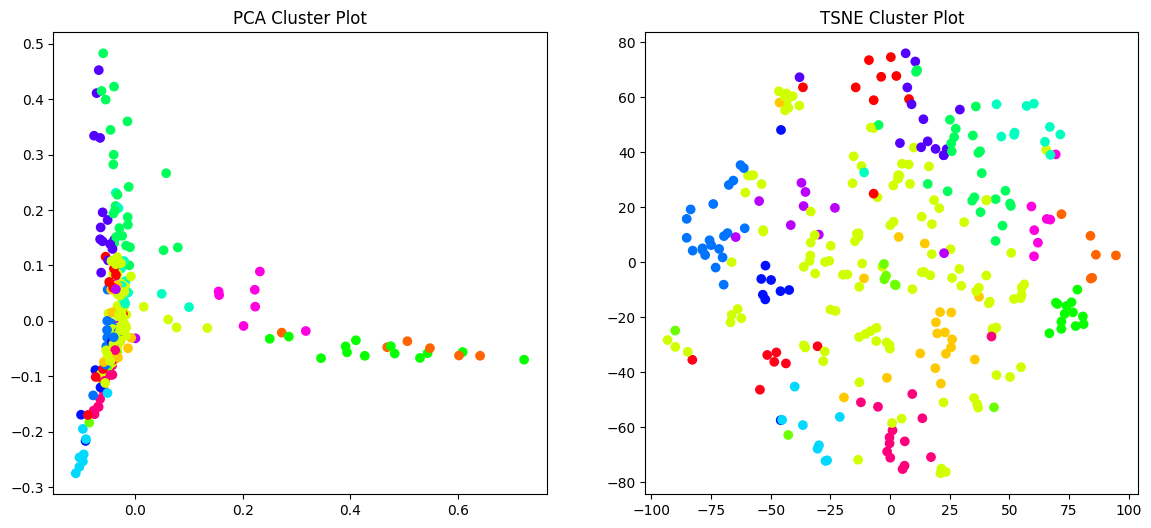

In [ ]:
plot_tsne_pca(svd_tfidf, clusters, 50)


In [ ]:
len(clusters)

186046

In [ ]:
vectorizer.get_feature_names_out()

array(['00s', '100bpm', '100hz', ..., 'zz', 'zzk', 'zzk quito'],
      dtype=object)

In [ ]:
get_top_keywords(svd_tfidf, clusters, vectorizer.get_feature_names_out(), 30)


Cluster 0
1920s,16bit 8bit,1930s music,160bpm,140bpm dubstep,170bpm bass,170bpm,160bpm bass,1940s,170bpm electronic,170bpm drum,1920s music,1920s jazz,150bpm electronic,1930s 1940s,1930s,160bpm 170bpm,160bpm drum,140bpm deep,12th,140bpm drum,13th,140bpm,100hz deep,130bpm,1080p,11th,00s,100bpm,128bpm

Cluster 1
170bpm electronic,140bpm electronic,16bit 8bit,1930s,1940s,170bpm,1930s music,1930s 1940s,170bpm drum,160bpm electronic,160bpm number,1920s,160bpm elastic,150bpm electronic,12th planet,16bit electronic,140bpm,140bpm number,140bpm dubstep,140bpm bass,160bpm drum,100hz,11th hour,11thhour,12xu,11th,160bpm 170bpm,150bpm,12inch,00s

Cluster 2
170bpm bass,160bpm drum,150bpm,1920s music,16bit electronic,170bpm,1930s 1940s,1930s music,170bpm drum,1920s jazz,170bpm electronic,140bpm electronic,140bpm number,16bit,1940s,16bit 8bit,1930s,170bpm darkdrumbass,140bpm drum,140bpm dubstep,160bpm bass,160bpm 170bpm,160bpm number,145bpm,10s,00s,100bpm,100hz deep,100hz,1080p

Cluster 3
160bpm,16bi

Referencing methodology in https://www.kaggle.com/code/fabiendaniel/customer-segmentation/notebook

### Visualize clusters as wordclouds

In [ ]:
#add cluster labels back to keyword df
token_item_description_df = token_item_description.to_frame().reset_index()
token_item_description_df['cluster'] = clusters

In [ ]:
token_item_description_df

index                                   cleaned_keywords  cluster
0            0                 alternative noise postpunk ireland        3
1            1     electronic psychedelic trance psytrance london        3
2            3  darkpop ebm electro electronic synthpop future...        3
3            4             experimental retribution united states        4
4            5                     alternative alternative vienna        3
...        ...                                                ...      ...
186041  999937  experimental collage cut up patreon plunderpho...        3
186042  999941  brooklyn experimental alt pop cello dream pop ...       11
186043  999971  electronic electronic music fruity loops lofi ...        3
186044  999972  dance electronic alt pop dancepop electronic p...       11
186045  999982             acoustic folk new instrumental ireland        0

[186046 rows x 3 columns]

In [ ]:
#map the cluster label back to the full data
keyword_to_cluster = token_item_description_df.set_index('cleaned_keywords')['cluster'].to_dict()
clean_text_df['cluster'] = clean_text_df['cleaned_keywords'].map(keyword_to_cluster)



In [ ]:
silhouette_avg = silhouette_score(svd_tfidf, clusters)


In [ ]:
silhouette_avg

0.1350690185010785

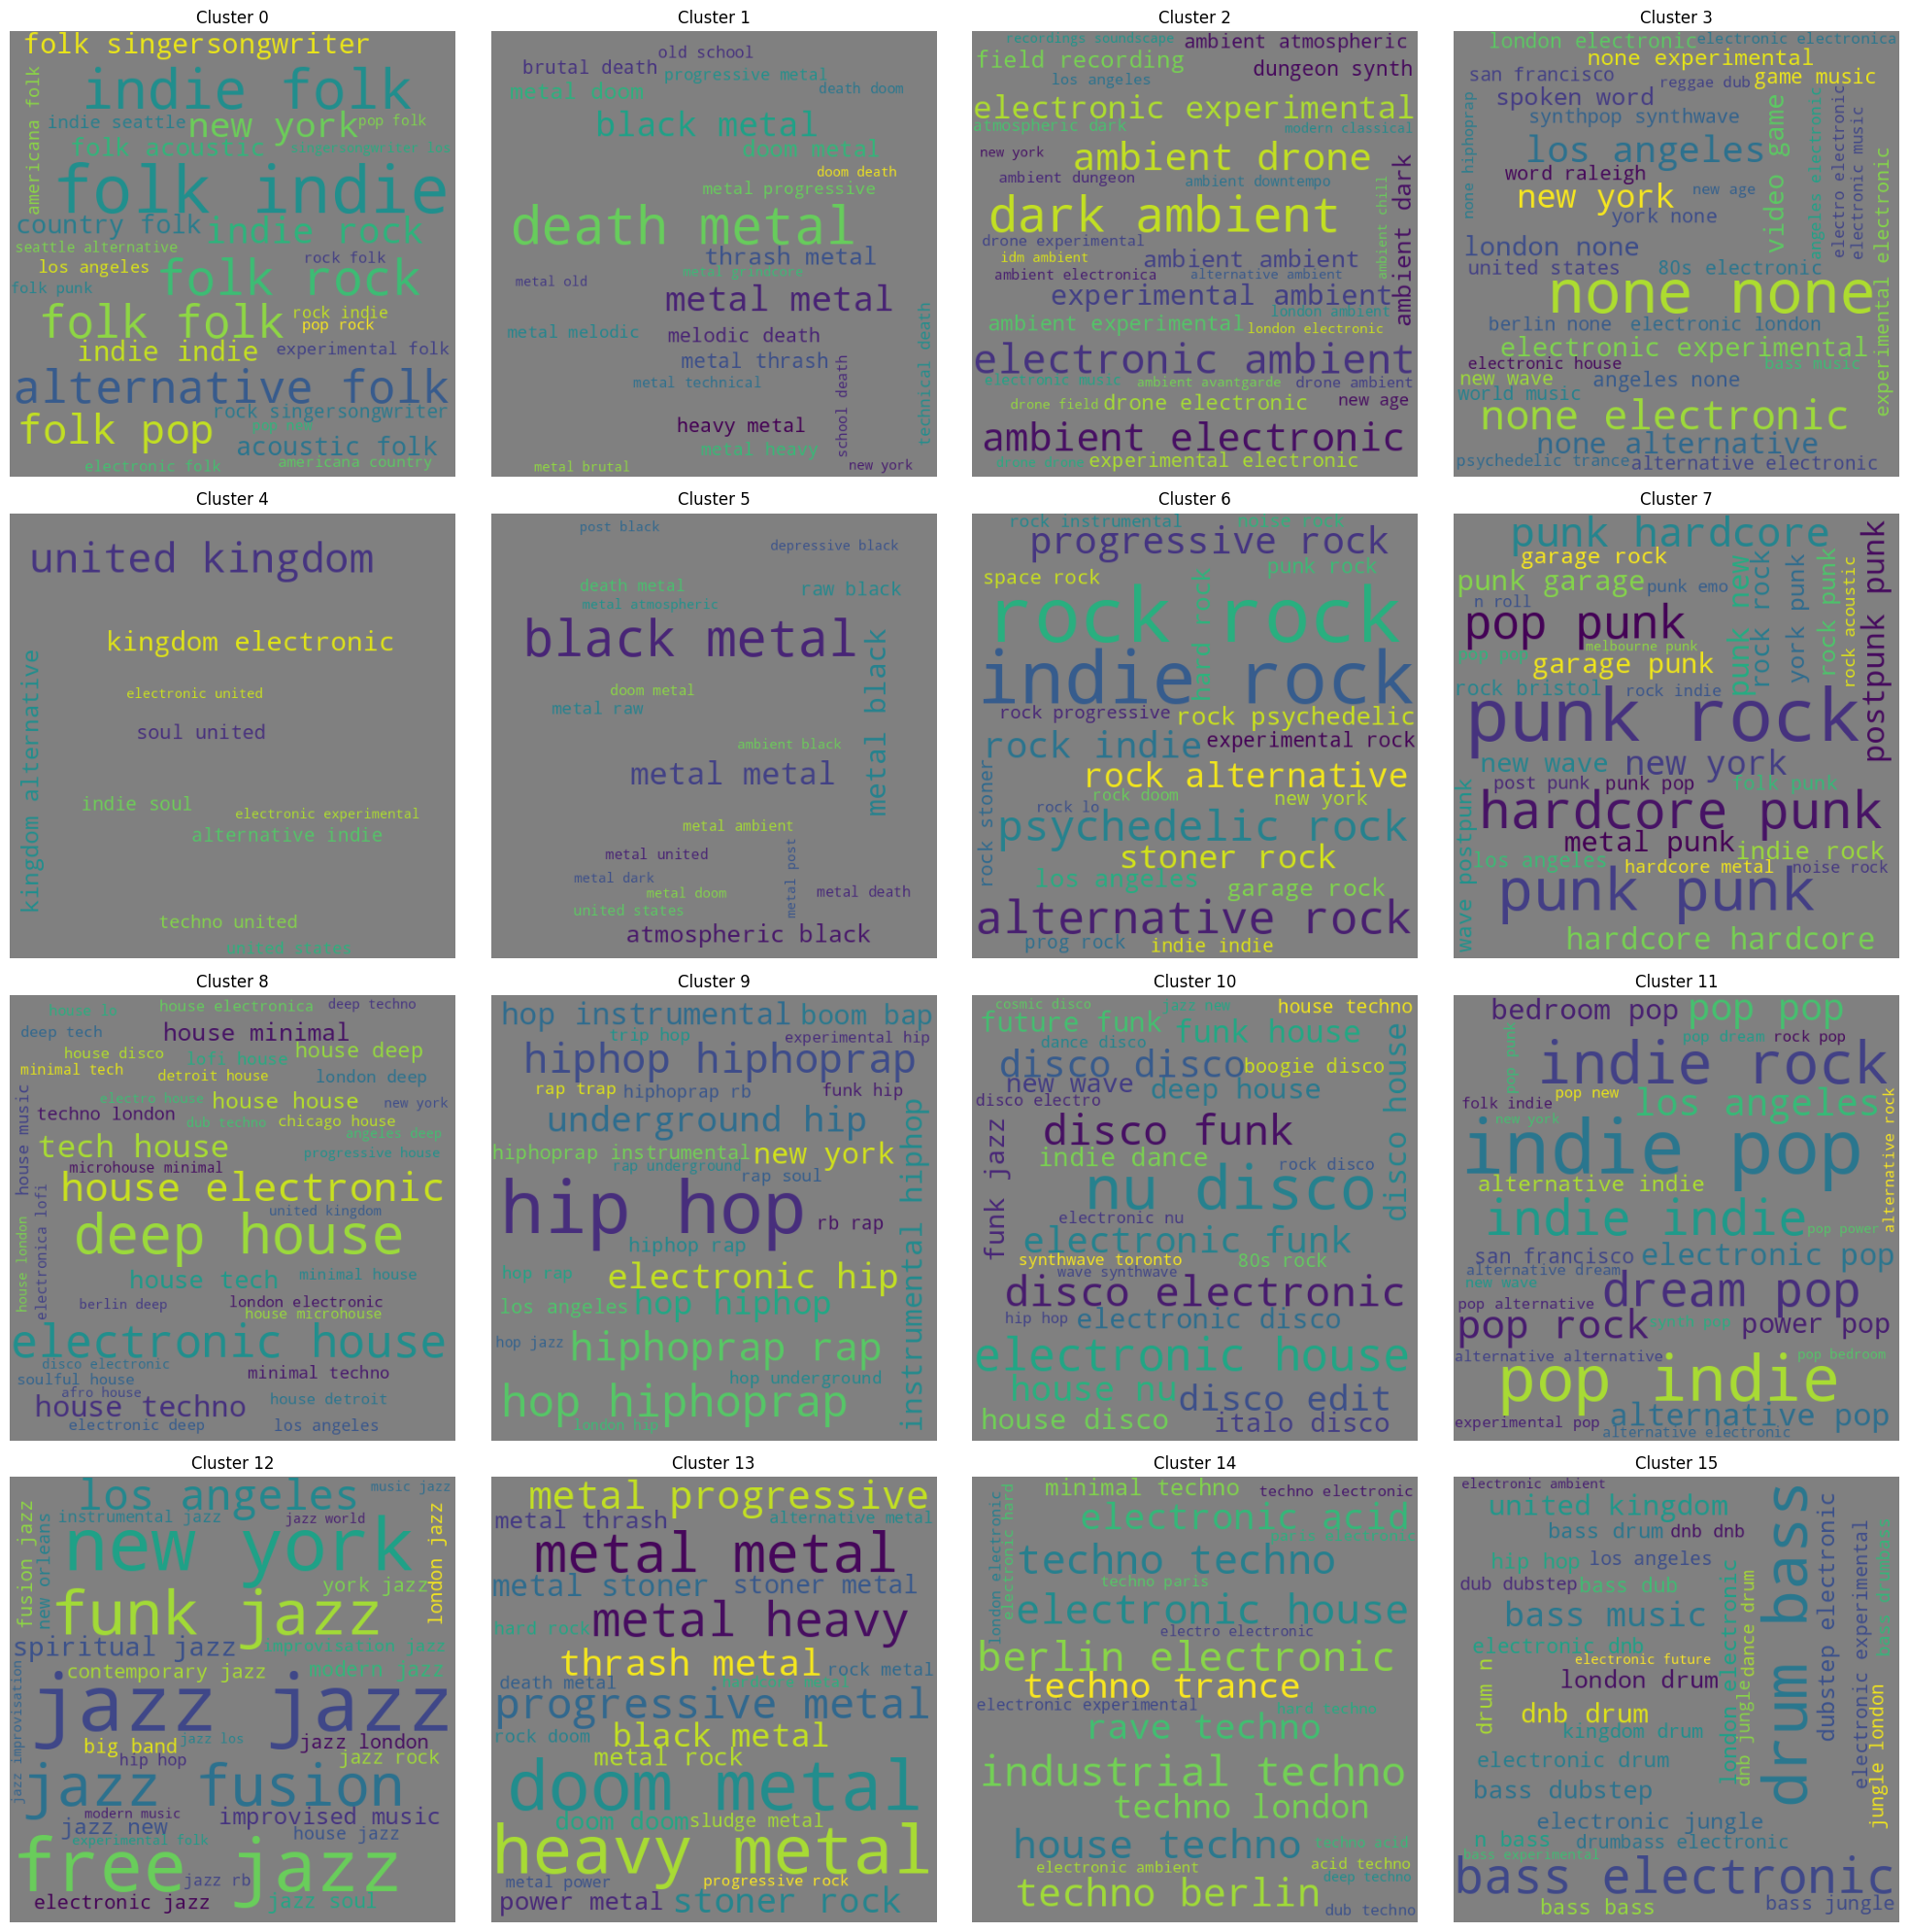

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i in range(16):  # 16 clusters
    cluster_text = ' '.join(clean_text_df[clean_text_df['cluster'] == i]['cleaned_keywords'])
    wordcloud = WordCloud(width=500, height=500, background_color='grey', max_words=60, min_font_size=15).generate(cluster_text)


    row = i // 4
    col = i % 4

    # Display the word cloud in the corresponding subplot
    axes[row, col].imshow(wordcloud)
    axes[row, col].axis("off")
    axes[row, col].set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()

According to the word clouds, we can categorize the music as:

Cluster 0: folk music

Cluster 1: metal music

Cluster 2: ambient music

Cluster 3: tagless music / music only tagged with location / Other

Cluster 4: music tagged with soul, alternative

Cluster 5: metal (redundant with 1)

Cluster 6: rock music and its subgenres except punk

Cluster 7: punk rock music

Cluster 8: house music

Cluster 9: hip-hop / rap

Cluster 10: disco / funk

Cluster 11: bedroom pop / indie pop

Cluster 12: jazz and jazz fusion and similar improv styles

Cluster 13: a wide variety of metal subgenres (redundant with 1)

Cluster 14: Techno and its subgenres

Cluster 15: UK Bass music (dubstep and drum&bass)


Cluster 1, 5 and 13 can be combined into just 1

It's also worth combining these styles of music into more encompassing genre categories

Cat 1: Rock (1 + 5 + 13 + 6 + 7)

Cat 2: folk, world (0)

Cat 3: electronic music (2 + 8  + 14 + 15)

Cat 4: Soul/funk (4 + 10)

Cat 5: hip-hop (9)

Cat 6: indie/pop (11)

Cat 7: jazz

# 6 - Preprocessing for clustering the full dataset

In [ ]:
#add cluster column
merged_df_price['music_category'] = clean_text_df['cluster']

In [ ]:
merged_df_price.to_csv('/content/drive/MyDrive/Dataset/merged_dataset_price_label.csv')

## 6b- continue

In [ ]:
#Load saved dataframe with converted price and categories
merged_df_price = pd.read_csv('/content/drive/MyDrive/Dataset/merged_dataset_price_label.csv', index_col=[0])

## Preprocessing (cont.)

Only need the following columns: item_type, country_code, amount_paid_usd, price_USD, generous, isBCFriday, music_category

In [ ]:
columns = ['item_type','country_code','amount_paid_usd','price_USD','generous','isBCFriday','music_category']

In [ ]:
merged_df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   _id               1000000 non-null  object 
 1   item_type         1000000 non-null  object 
 2   utc_date          1000000 non-null  float64
 3   country_code      1000000 non-null  object 
 4   country           1000000 non-null  object 
 5   amount_paid_fmt   1000000 non-null  object 
 6   item_price        1000000 non-null  float64
 7   item_description  1000000 non-null  object 
 8   url               1000000 non-null  object 
 9   amount_paid       1000000 non-null  float64
 10  artist_name       1000000 non-null  object 
 11  currency          1000000 non-null  object 
 12  album_title       1000000 non-null  object 
 13  amount_paid_usd   1000000 non-null  float64
 14  amount_over_fmt   1000000 non-null  float64
 15  keywords          1000000 non-null  object 
 16  d

In [ ]:
#filter columns
final_merged_df = merged_df_price[columns]
final_merged_df

item_type country_code  amount_paid_usd  price_USD  generous  \
0              a           gb             9.99   9.990000         0   
1              a           fi             1.30   1.290715         0   
2              a           fi             3.90   3.872145         0   
3              p           gb            12.39  12.361650         0   
4              t           us             1.00   1.000000         0   
...          ...          ...              ...        ...       ...   
999995         p           ca            20.00  20.000000         0   
999996         a           us            20.20  20.200001         0   
999997         a           au             1.00   0.000000         0   
999998         p           us             6.00   6.000000         0   
999999         p           gb            38.59  38.809789         0   

        isBCFriday  music_category  
0                0             3.0  
1                0             3.0  
2                0             3.0  
3                0             3.0  
4                0             4.0  
...            ...             ...  
999995           1             3.0  
999996           1             3.0  
999997           1             5.0  
999998           1             3.0  
999999           1            11.0  

[1000000 rows x 7 columns]

In [ ]:
#Target-mean encode country_code
def target_mean_encode(feature, target):
    encoded = feature
    for val in feature.unique():
        ser_pure = feature[feature==val]
        target_pure = target[ser_pure.index].sum()
        encoded = encoded.replace(val, target_pure/len(ser_pure))
    return encoded

In [ ]:
country_encoded = target_mean_encode(feature=final_merged_df['country_code'], target=final_merged_df['generous'])
final_merged_df_with_encoding = pd.concat([final_merged_df, country_encoded.rename('country_encoded')], axis=1)
final_merged_df_with_encoding

item_type country_code  amount_paid_usd  price_USD  generous  \
0              a           gb             9.99   9.990000         0   
1              a           fi             1.30   1.290715         0   
2              a           fi             3.90   3.872145         0   
3              p           gb            12.39  12.361650         0   
4              t           us             1.00   1.000000         0   
...          ...          ...              ...        ...       ...   
999995         p           ca            20.00  20.000000         0   
999996         a           us            20.20  20.200001         0   
999997         a           au             1.00   0.000000         0   
999998         p           us             6.00   6.000000         0   
999999         p           gb            38.59  38.809789         0   

        isBCFriday  music_category  country_encoded  
0                0             3.0         0.097724  
1                0             3.0         0.096065  
2                0             3.0         0.096065  
3                0             3.0         0.097724  
4                0             4.0         0.150925  
...            ...             ...              ...  
999995           1             3.0         0.153824  
999996           1             3.0         0.150925  
999997           1             5.0         0.124245  
999998           1             3.0         0.150925  
999999           1            11.0         0.097724  

[1000000 rows x 8 columns]

In [ ]:
#one-hot encode item-type
enc = OneHotEncoder()

dummies = pd.get_dummies(final_merged_df_with_encoding['item_type'])
final_merged_df_with_encoding = pd.concat([final_merged_df_with_encoding, dummies], axis=1)


In [ ]:
#one-hot encode music category

#dummies = pd.get_dummies(final_merged_df_with_encoding['music_category'])
#final_merged_df_with_encoding = pd.concat([final_merged_df_with_encoding, dummies], axis=1)

In [ ]:
#normalize amount_paid and price_usd
constant = 1 #constant for dealing with zero values
final_merged_df_with_encoding['amount_paid_usd'] = np.log(final_merged_df_with_encoding['amount_paid_usd'] + constant)
final_merged_df_with_encoding['price_USD'] = np.log(final_merged_df_with_encoding['price_USD'] + constant)



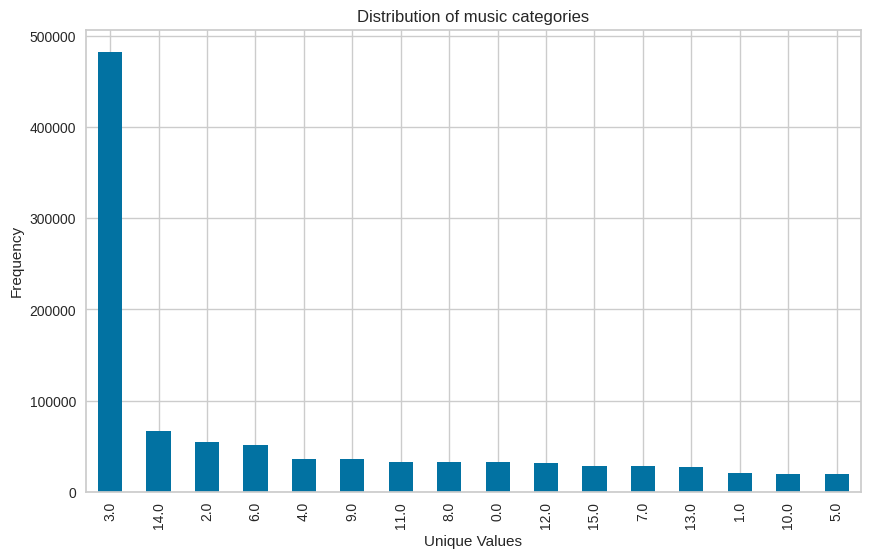

In [ ]:
counts = final_merged_df_with_encoding['music_category'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Distribution of music categories')
plt.show()

In [ ]:
#drop original column

#columns_drop = ['item_type' , 'country_code', 'music_category']
columns_drop = ['item_type' , 'country_code']

final_merged_df_with_encoding = final_merged_df_with_encoding.drop(columns_drop, axis = 1)

In [ ]:
final_merged_df_with_encoding.to_csv('/content/drive/MyDrive/Dataset/final_merged_df_with_encoding.csv')

# 7 - Clustering transactions

## 7b - continue from after processing

In [ ]:
final_merged_df_with_encoding = pd.read_csv('/content/drive/MyDrive/Dataset/final_merged_df_with_encoding.csv', index_col=[0])

In [ ]:
final_merged_df_with_encoding.dropna(inplace=True)

In [ ]:
final_merged_df_with_encoding

amount_paid_usd  price_USD  generous  isBCFriday  music_category  \
0              2.396986   2.396986         0           0             3.0   
1              0.832909   0.828864         0           0             3.0   
2              1.589235   1.583534         0           0             3.0   
3              2.594508   2.592389         0           0             3.0   
4              0.693147   0.693147         0           0             4.0   
...                 ...        ...       ...         ...             ...   
999995         3.044522   3.044522         0           1             3.0   
999996         3.054001   3.054001         0           1             3.0   
999997         0.693147   0.000000         0           1             5.0   
999998         1.945910   1.945910         0           1             3.0   
999999         3.678577   3.684113         0           1            11.0   

        country_encoded  a  b  p  t  
0              0.097724  1  0  0  0  
1              0.096065  1  0  0  0  
2              0.096065  1  0  0  0  
3              0.097724  0  0  1  0  
4              0.150925  0  0  0  1  
...                 ... .. .. .. ..  
999995         0.153824  0  0  1  0  
999996         0.150925  1  0  0  0  
999997         0.124245  1  0  0  0  
999998         0.150925  0  0  1  0  
999999         0.097724  0  0  1  0  

[999995 rows x 10 columns]

## Dimensionality Reduction via PCA

In [ ]:
#convert category columns to string and add prefix cat_

#final_merged_df_with_encoding.columns = final_merged_df_with_encoding.columns.astype(str)

#last_16_cols = final_merged_df_with_encoding.columns[-16:]
#final_merged_df_with_encoding.rename(columns={col: 'cat_' + col for col in last_16_cols}, inplace=True)


In [ ]:
#scale data
from sklearn.preprocessing import MinMaxScaler

scaler = scaler = MinMaxScaler()
final_merged_df_with_encoding_std = scaler.fit_transform(final_merged_df_with_encoding)

In [ ]:
pca = PCA()
pca.fit(final_merged_df_with_encoding_std)

pca.explained_variance_ratio_

array([3.56182970e-01, 2.62306222e-01, 1.82471270e-01, 9.71204097e-02,
       7.14155015e-02, 1.62646761e-02, 1.23849951e-02, 9.95398673e-04,
       8.58556828e-04, 4.57055990e-32])

In [ ]:
len(pca.explained_variance_ratio_)

10

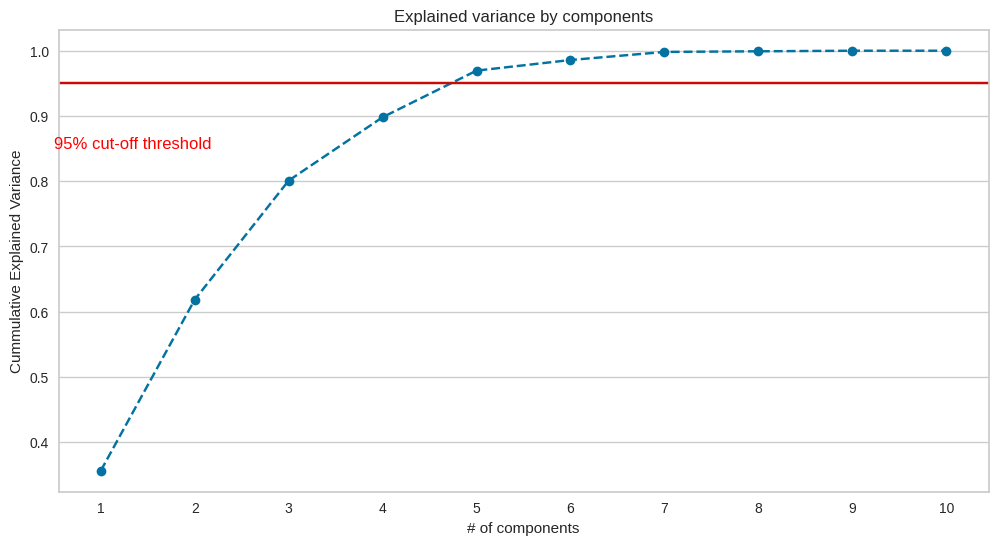

In [ ]:

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()

plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('# of components')
plt.xticks(np.arange(1, 11, step=1))
plt.ylabel('Cummulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=12)
ax.grid(axis='x')

Looks like having 5 components will preserve 95% of the variance so that is what I will proceed with

In [ ]:
pca = PCA(n_components = 5)
pca.fit_transform(final_merged_df_with_encoding_std)

array([[ 0.60779436, -0.07827601, -0.27134363, -0.17561415, -0.17964447],
       [ 0.60517057, -0.16601677, -0.25496344, -0.1691768 , -0.18886711],
       [ 0.6064395 , -0.1237006 , -0.26286267, -0.17225044, -0.18441102],
       ...,
       [ 0.62374374,  0.02565795,  0.72605689, -0.17239994, -0.06377795],
       [-0.4804405 ,  0.94441347,  0.53193099, -0.04704537, -0.12230323],
       [-0.49147021,  0.994318  ,  0.52785427, -0.12671631,  0.41393484]])

## Determine optimal K

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


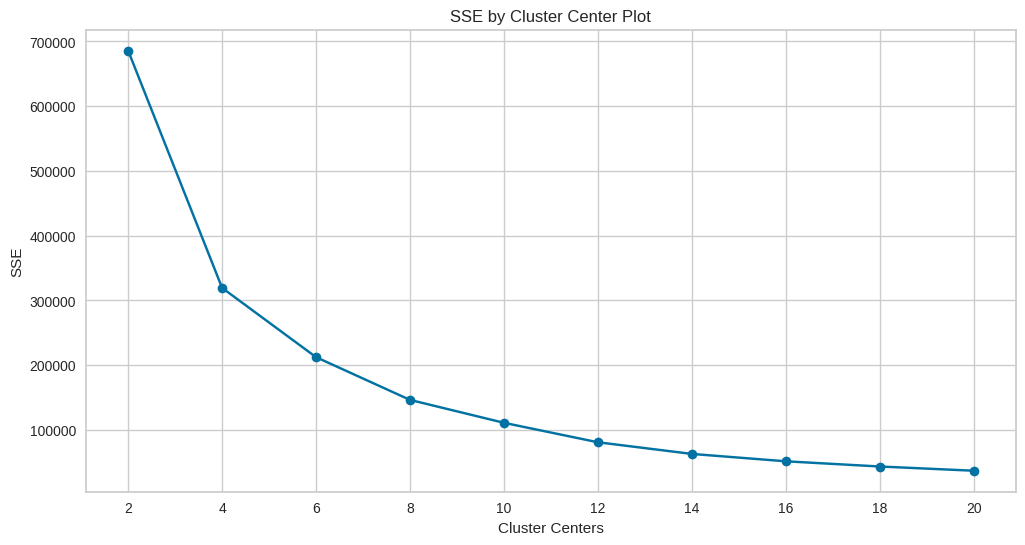

In [ ]:
find_optimal_clusters(final_merged_df_with_encoding_std, 20)

# 8 - Cluster via K-means

In [ ]:
km = KMeans(init='k-means++', n_clusters = 4, n_init=30)

In [ ]:
clusters = KMeans(init='k-means++', n_clusters = 4, n_init=30).fit_predict(final_merged_df_with_encoding_std)

In [ ]:
from sklearn.metrics import davies_bouldin_score
print('the Davies Bouldin score with k = 4 is', davies_bouldin_score(final_merged_df_with_encoding_std, clusters))

the Davies Bouldin score with k = 4 is 0.8264863004084464


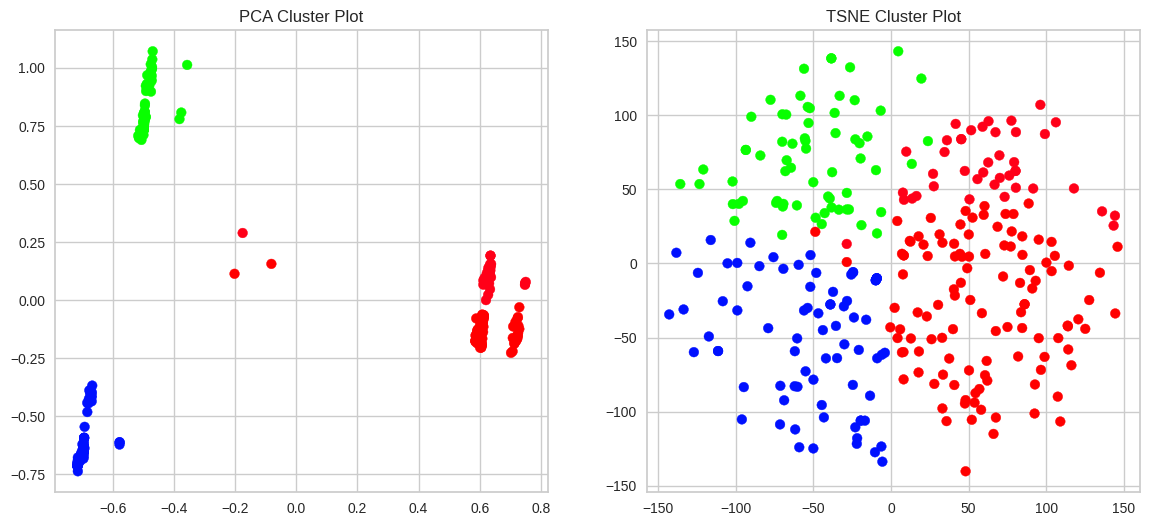

In [ ]:
plot_tsne_pca_full2(final_merged_df_with_encoding_std, clusters, 5)

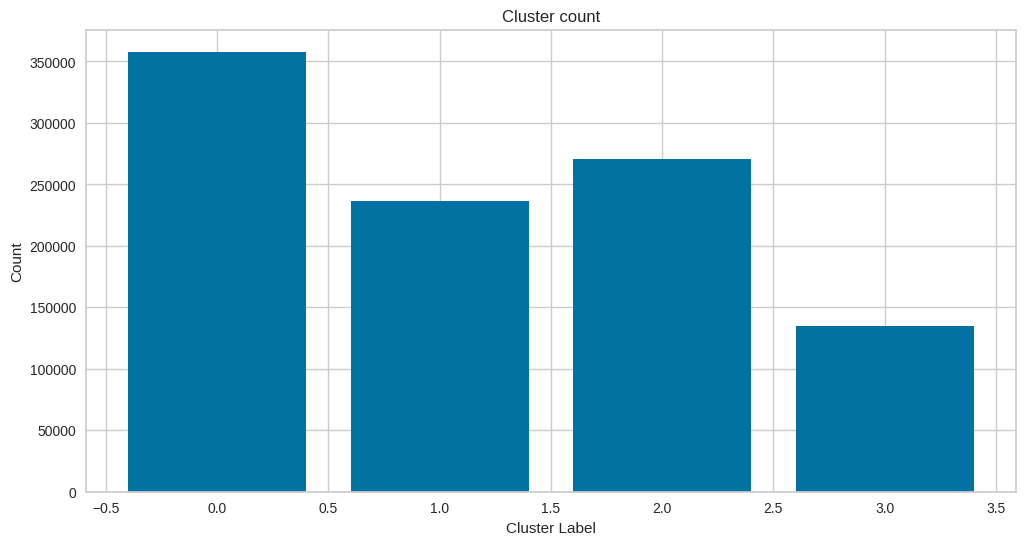

In [ ]:
from collections import Counter

counter = Counter(clusters)

plt.bar(counter.keys(), counter.values())

plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Cluster count')

plt.show()

In [ ]:
final_merged_df.dropna(inplace=True)
final_merged_df['cluster'] =  clusters

In [ ]:
final_merged_df

item_type country_code  amount_paid_usd  price_USD  generous  \
0              a           gb             9.99   9.990000         0   
1              a           fi             1.30   1.290715         0   
2              a           fi             3.90   3.872145         0   
3              p           gb            12.39  12.361650         0   
4              t           us             1.00   1.000000         0   
...          ...          ...              ...        ...       ...   
999995         p           ca            20.00  20.000000         0   
999996         a           us            20.20  20.200001         0   
999997         a           au             1.00   0.000000         0   
999998         p           us             6.00   6.000000         0   
999999         p           gb            38.59  38.809789         0   

        isBCFriday  music_category  cluster  
0                0             3.0        0  
1                0             3.0        0  
2                0             3.0        0  
3                0             3.0        1  
4                0             4.0        2  
...            ...             ...      ...  
999995           1             3.0        1  
999996           1             3.0        3  
999997           1             5.0        3  
999998           1             3.0        1  
999999           1            11.0        1  

[999995 rows x 8 columns]

## save dataframe with cluster labels

In [ ]:
#add full country names and merge 5 and 13 music cat with music cat 1
merged_df_price.dropna(inplace=True)
final_merged_df['country'] = merged_df_price['country']
final_merged_df['music_category'] = final_merged_df['music_category'].replace({5.0: 1.0, 13.0: 1.0})


In [ ]:

final_merged_df.to_csv('/content/drive/MyDrive/Dataset/final_merged_df_with_labels.csv')

## 8b - continue from dataframe with labels

In [ ]:
final_merged_df = pd.read_csv('/content/drive/MyDrive/Dataset/final_merged_df_with_labels.csv', index_col=[0])

In [ ]:
final_merged_df

item_type country_code  amount_paid_usd  price_USD  generous  \
0              a           gb             9.99   9.990000         0   
1              a           fi             1.30   1.290715         0   
2              a           fi             3.90   3.872145         0   
3              p           gb            12.39  12.361650         0   
4              t           us             1.00   1.000000         0   
...          ...          ...              ...        ...       ...   
999995         p           ca            20.00  20.000000         0   
999996         a           us            20.20  20.200001         0   
999997         a           au             1.00   0.000000         0   
999998         p           us             6.00   6.000000         0   
999999         p           gb            38.59  38.809789         0   

        isBCFriday  music_category  cluster         country  a  b  p  t  
0                0             3.0        0  United Kingdom  1  0  0  0  
1                0             3.0        0         Finland  1  0  0  0  
2                0             3.0        0         Finland  1  0  0  0  
3                0             3.0        1  United Kingdom  0  0  1  0  
4                0             4.0        2   United States  0  0  0  1  
...            ...             ...      ...             ... .. .. .. ..  
999995           1             3.0        1          Canada  0  0  1  0  
999996           1             3.0        3   United States  1  0  0  0  
999997           1             1.0        3       Australia  1  0  0  0  
999998           1             3.0        1   United States  0  0  1  0  
999999           1            11.0        1  United Kingdom  0  0  1  0  

[999995 rows x 13 columns]

## Results

In [ ]:
music_style_dict = {
    0.0: "folk music",
    1.0: "metal music",
    2.0: "ambient music",
    3.0: "tagless music / Other",
    4.0: "Soul",
    5.0: "Metal",
    6.0: "rock music",
    7.0: "punk rock music",
    8.0: "house music",
    9.0: "hip-hop / rap",
    10.0: "disco / funk",
    11.0: "bedroom pop / indie pop",
    12.0: "jazz",
    13.0: "metal subgenres",
    14.0: "Techno and its subgenres",
    15.0: "UK Bass music",
}

music_genre_dict = {
    1.0: "Rock",
    5.0: "Rock",
    13.0: "Rock",
    6.0: "Rock",
    7.0: "Rock",
    0.0: "Folk, World",
    2.0: "Electronic Music",
    8.0: "Electronic Music",
    14.0: "Electronic Music",
    15.0: "Electronic Music",
    4.0: "Soul/Funk",
    10.0: "Soul/Funk",
    9.0: "Hip-Hop",
    11.0: "Indie/Pop",
    12.0: "Jazz",
    3.0: "Tagless Music / Other",
}

genre_color_dict = {
    "Rock" : '#719685',
    "Folk, World" : '#CFBD8B',
    "Electronic Music" : '#E8D5B0',
    "Soul/Funk" : '#D19FBB',
    "Hip-Hop" : '#837DB8',
    "Indie/Pop" : '#32A691',
    "Jazz" : '#494C66',
    "Tagless Music / Other" : '#E3762B'
}

style_color_dict = {
    "folk music" : '#719685' ,
    "metal music" : '#CFBD8B',
    "ambient music" : '#E8D5B0',
    "tagless music / Other" : '#D19FBB',
    "Soul" : '#837DB8',
    "Metal" : '#837DB8',
    "rock music" : '#32A691' ,
    "punk rock music" : '#494C66',
    "house music" : '#E3762B',
    "hip-hop / rap" : '#F62E97',
    "disco / funk" : '#153CB4',
    "bedroom pop / indie pop" : '#F9AC53',
    "jazz" : '#E93479',
    "metal subgenres" : '#300350',
    "Techno and its subgenres" : '#C8243A',
    "UK Bass music" : '#19ADB4',
}

In [ ]:
#create a more encompassing genre column

final_merged_df['genre'] = final_merged_df['music_category'].map(music_genre_dict)
final_merged_df['music_category'] = final_merged_df['music_category'].map(music_style_dict)


In [ ]:
#seperate dataframe without the tagless music

final_merged_df_noTagless = final_merged_df[final_merged_df['genre'] != 'Tagless Music / Other']
final_merged_df_noTagless

item_type country_code  amount_paid_usd  price_USD  generous  \
4              t           us             1.00   1.000000         0   
8              t           ch             2.35   2.342827         0   
10             a           gb             9.09   9.035006         0   
11             t           us             1.00   1.000000         0   
12             t           us             2.99   2.990000         0   
...          ...          ...              ...        ...       ...   
999985         p           de            32.14  32.328554         0   
999988         a           us             7.00   0.000000         1   
999989         p           us            12.00  12.000000         0   
999997         a           au             1.00   0.000000         0   
999999         p           gb            38.59  38.809789         0   

        isBCFriday           music_category  cluster         country  a  b  p  \
4                0                     Soul        2   United States  0  0  0   
8                0             disco / funk        2     Switzerland  0  0  0   
10               0            ambient music        0  United Kingdom  1  0  0   
11               0                     Soul        2   United States  0  0  0   
12               0                     Soul        2   United States  0  0  0   
...            ...                      ...      ...             ... .. .. ..   
999985           1  bedroom pop / indie pop        1         Germany  0  0  1   
999988           1               folk music        3   United States  1  0  0   
999989           1                     jazz        1   United States  0  0  1   
999997           1              metal music        3       Australia  1  0  0   
999999           1  bedroom pop / indie pop        1  United Kingdom  0  0  1   

        t             genre  
4       1         Soul/Funk  
8       1         Soul/Funk  
10      0  Electronic Music  
11      1         Soul/Funk  
12      1         Soul/Funk  
...    ..               ...  
999985  0         Indie/Pop  
999988  0       Folk, World  
999989  0              Jazz  
999997  0              Rock  
999999  0         Indie/Pop  

[517135 rows x 14 columns]

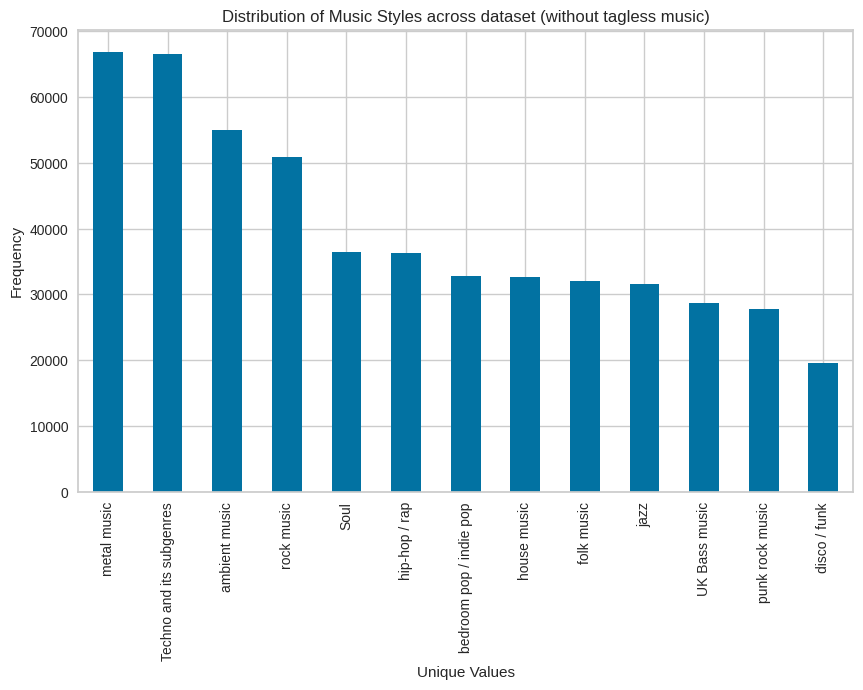

In [ ]:
counts = final_merged_df_noTagless['music_category'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Distribution of Music Styles across dataset (without tagless music)')
plt.show()

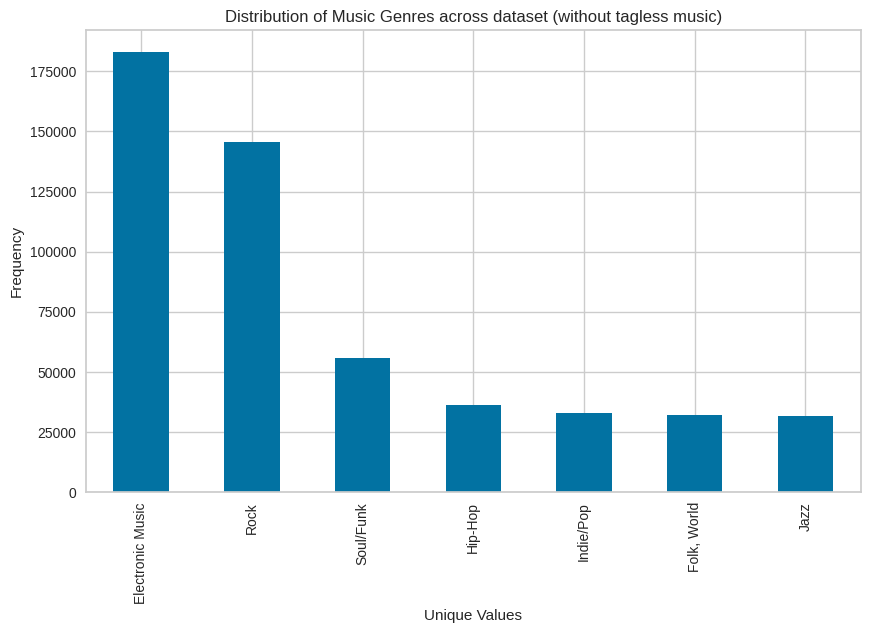

In [ ]:
counts = final_merged_df_noTagless['genre'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Distribution of Music Genres across dataset (without tagless music)')
plt.show()

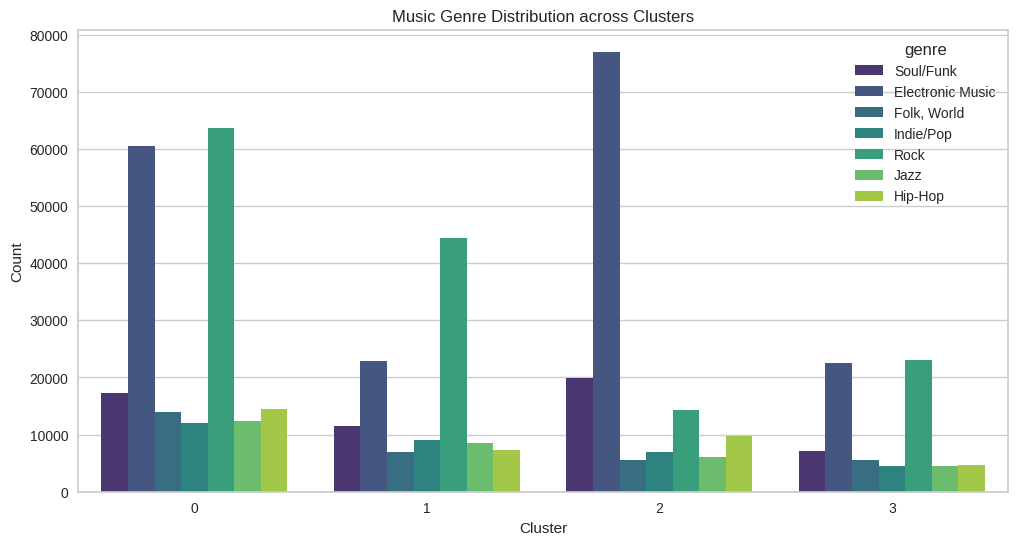

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', hue='genre', data=final_merged_df_noTagless, palette='viridis')
plt.title('Music Genre Distribution across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

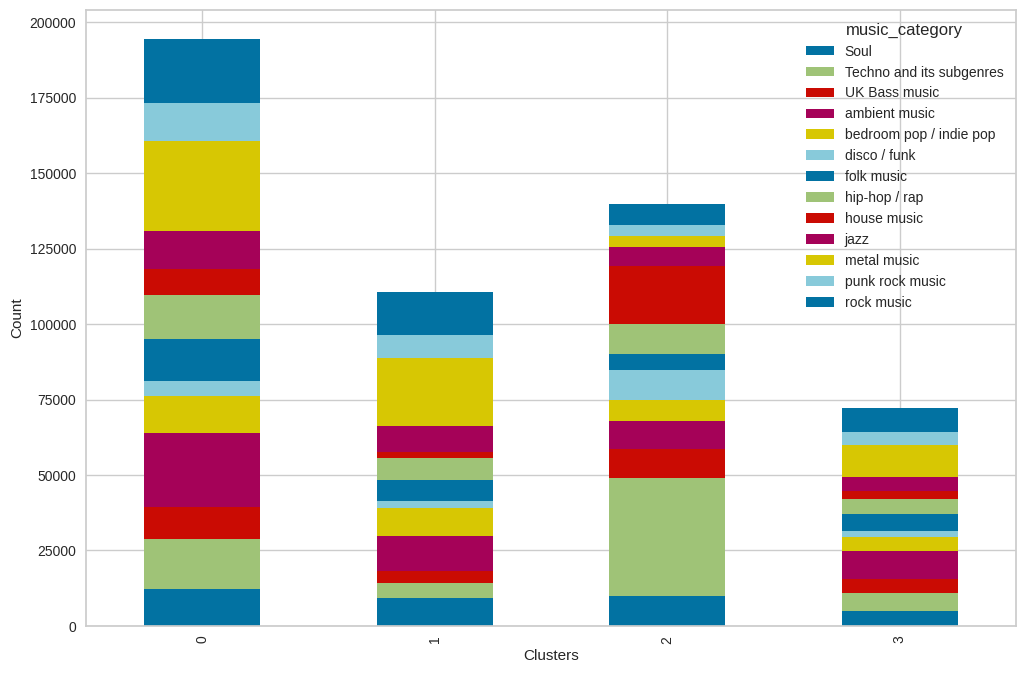

In [ ]:
counts_df = pd.crosstab(final_merged_df_noTagless['cluster'], final_merged_df_noTagless['music_category'])
counts_df.plot(kind='bar', stacked=True, figsize=(12,8))
plt.ylabel('Count')
plt.xlabel('Clusters')
plt.show()

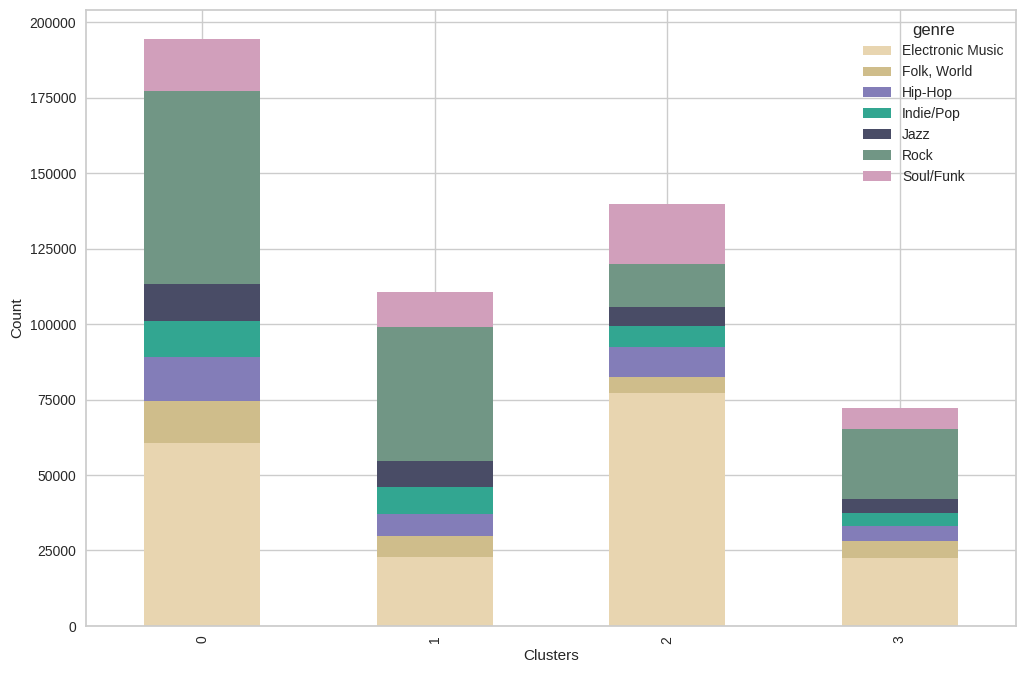

In [ ]:
counts_df = pd.crosstab(final_merged_df_noTagless['cluster'], final_merged_df_noTagless['genre'])
counts_df.plot(kind='bar', stacked=True, figsize=(12,8), color = genre_color_dict)
plt.ylabel('Count')
plt.xlabel('Clusters')
plt.show()

In [ ]:
genre_dict_test = dict.fromkeys(final_merged_df_noTagless['genre'])
genre_dict_test

{'Soul/Funk': None,
 'Electronic Music': None,
 'Folk, World': None,
 'Indie/Pop': None,
 'Rock': None,
 'Jazz': None,
 'Hip-Hop': None}

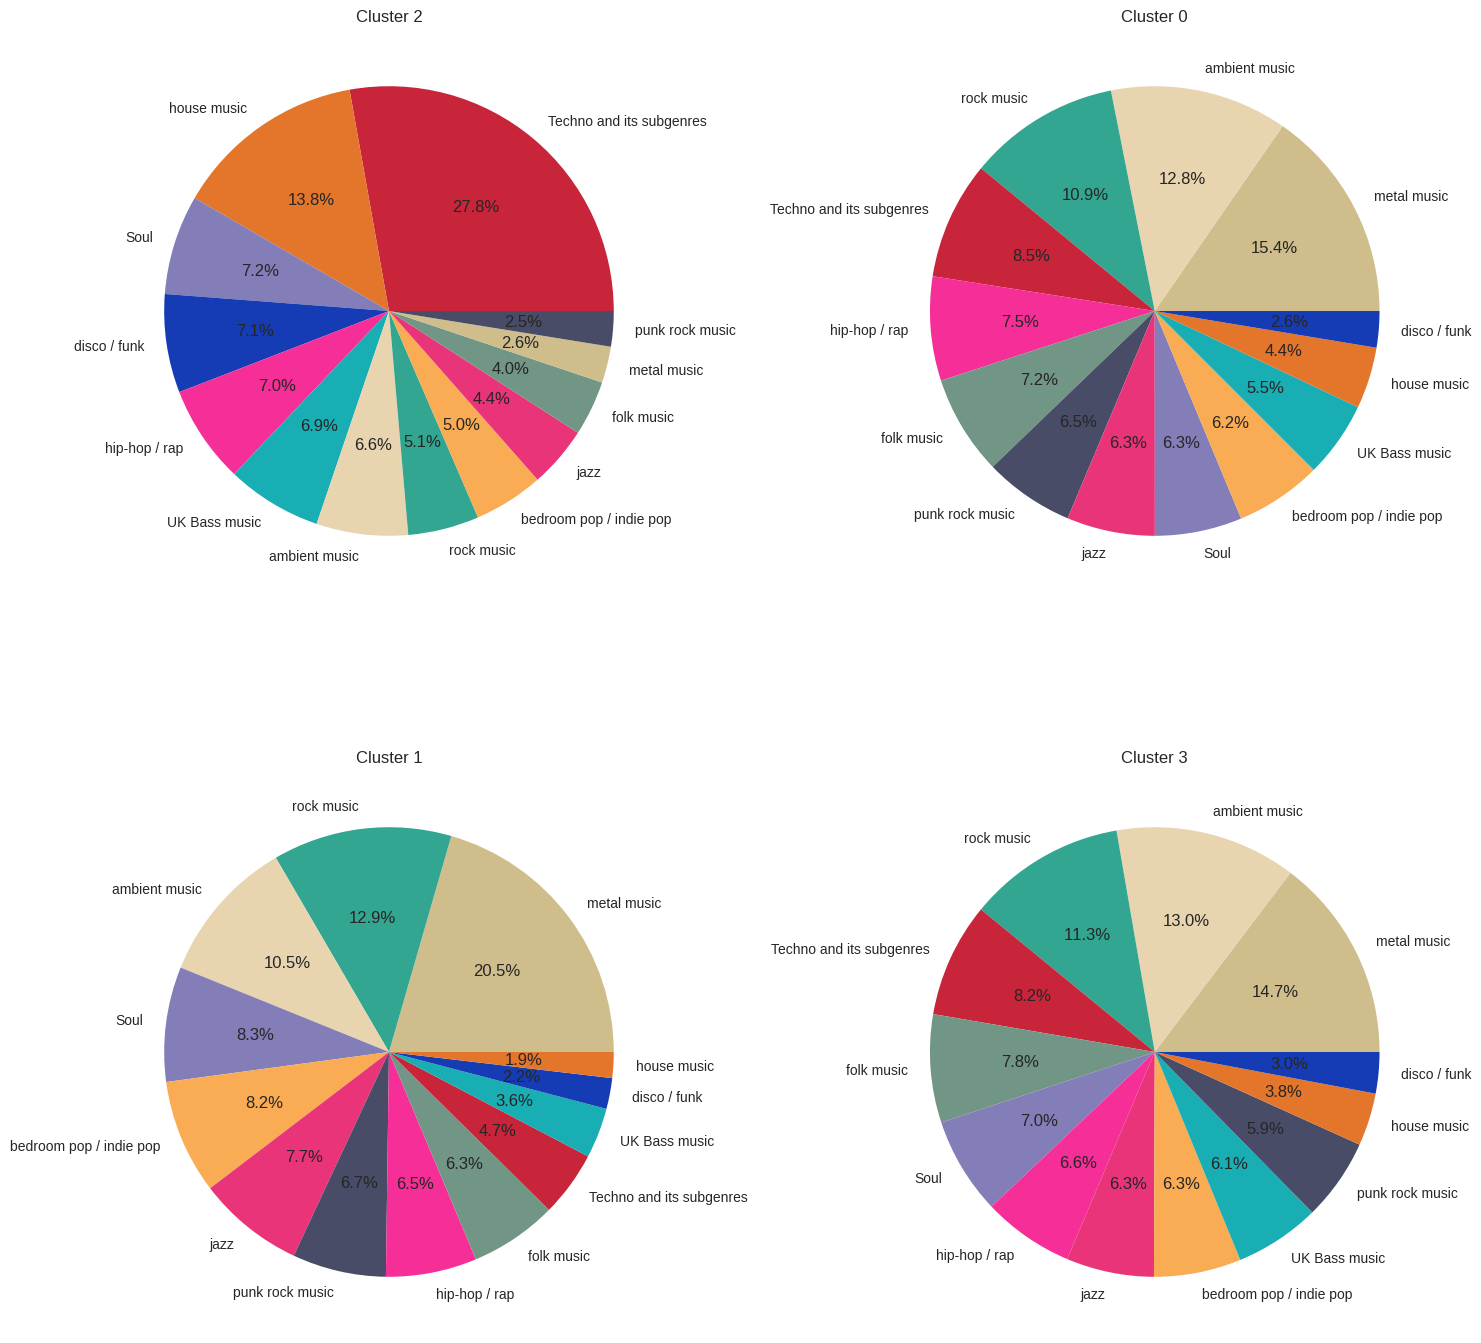

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

style_dict_plt = dict.fromkeys(final_merged_df_noTagless['music_category'])

clusters = final_merged_df_noTagless['cluster'].unique()

for i, (ax, cluster) in enumerate(zip(axs.flatten(), clusters)):
    cluster_data = final_merged_df_noTagless[final_merged_df_noTagless['cluster'] == cluster]['music_category']
    cluster_counts = cluster_data.value_counts()
    cluster_colors = [style_color_dict[genre] for genre in cluster_counts.index]
    ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=cluster_colors)
    ax.set_title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()

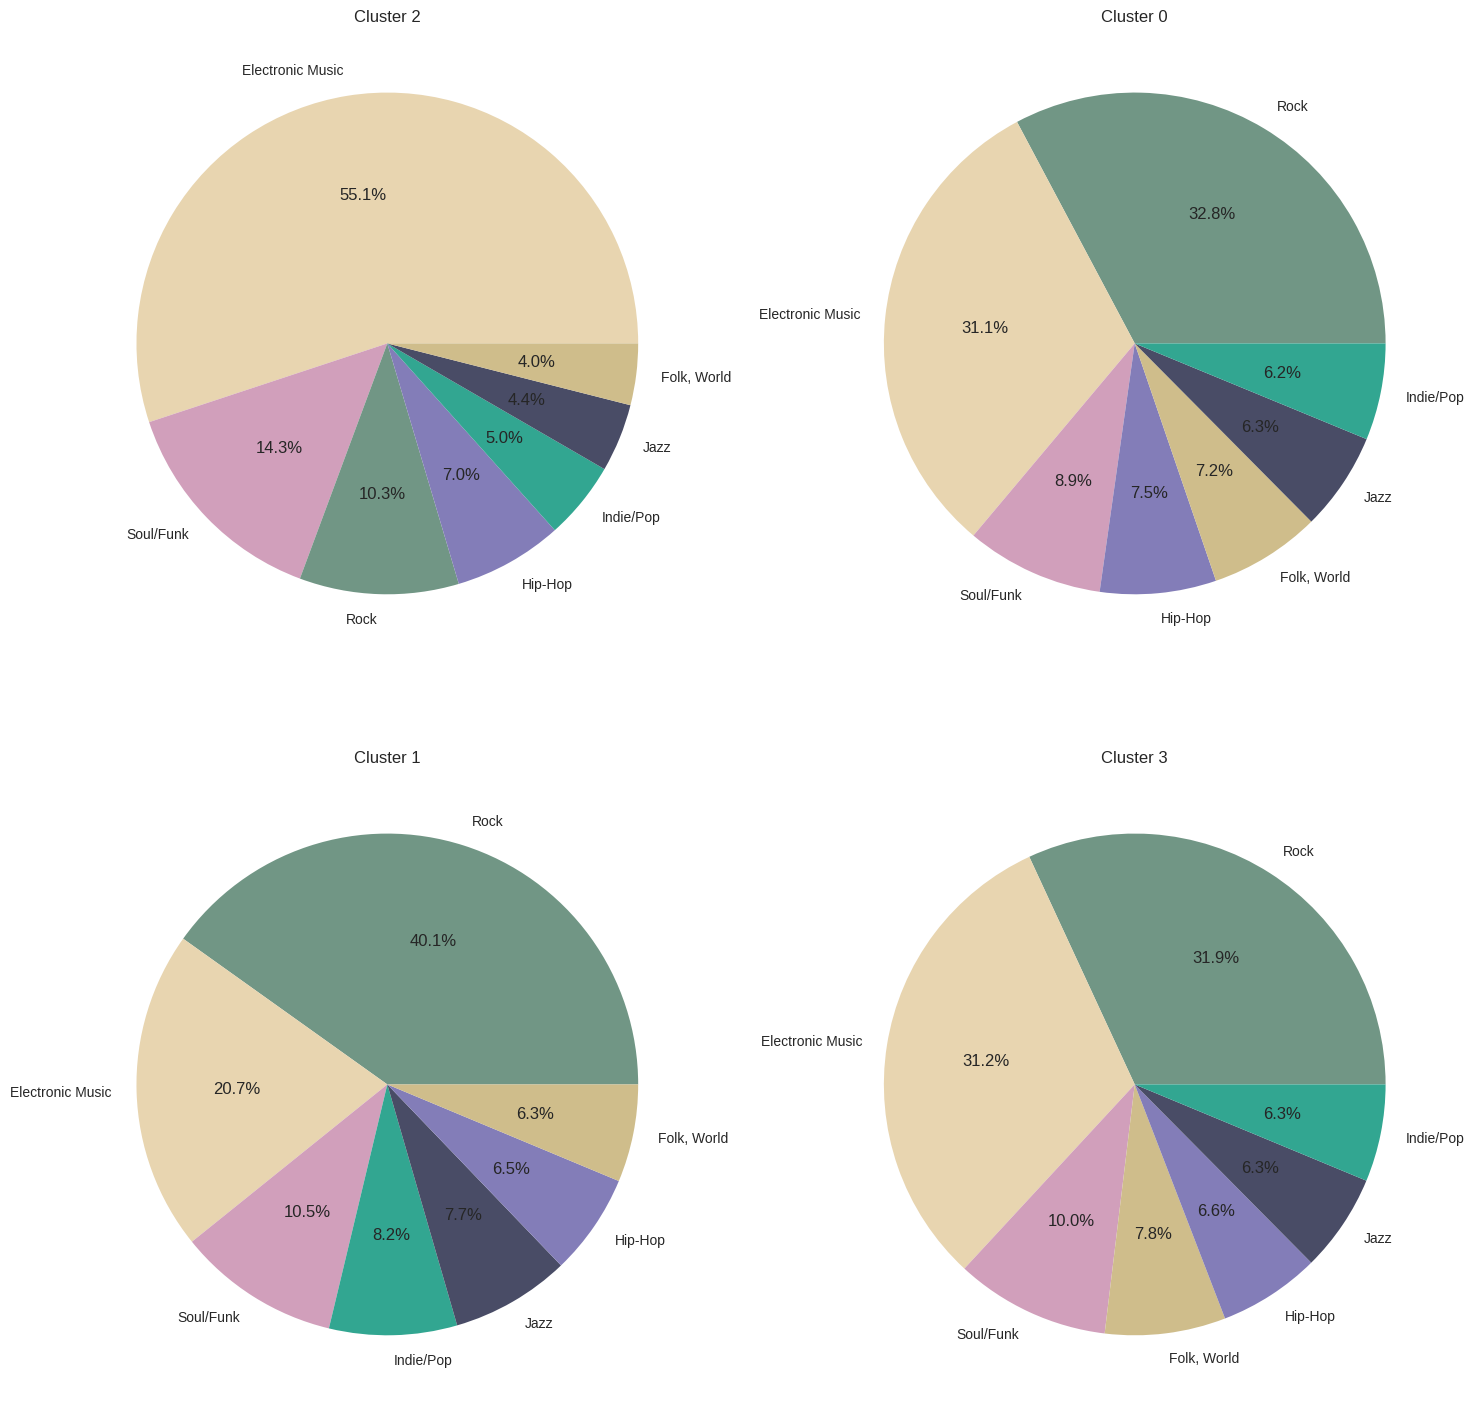

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

genre_dict_plt = dict.fromkeys(final_merged_df_noTagless['genre'])

clusters = final_merged_df_noTagless['cluster'].unique()

for i, (ax, cluster) in enumerate(zip(axs.flatten(), clusters)):
    cluster_data = final_merged_df_noTagless[final_merged_df_noTagless['cluster'] == cluster]['genre']
    cluster_counts = cluster_data.value_counts()
    cluster_colors = [genre_color_dict[genre] for genre in cluster_counts.index]
    ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=cluster_colors)
    ax.set_title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()

In [ ]:
pip install geopandas matplotlib descartes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 89.2 MB/s eta 0:00:00


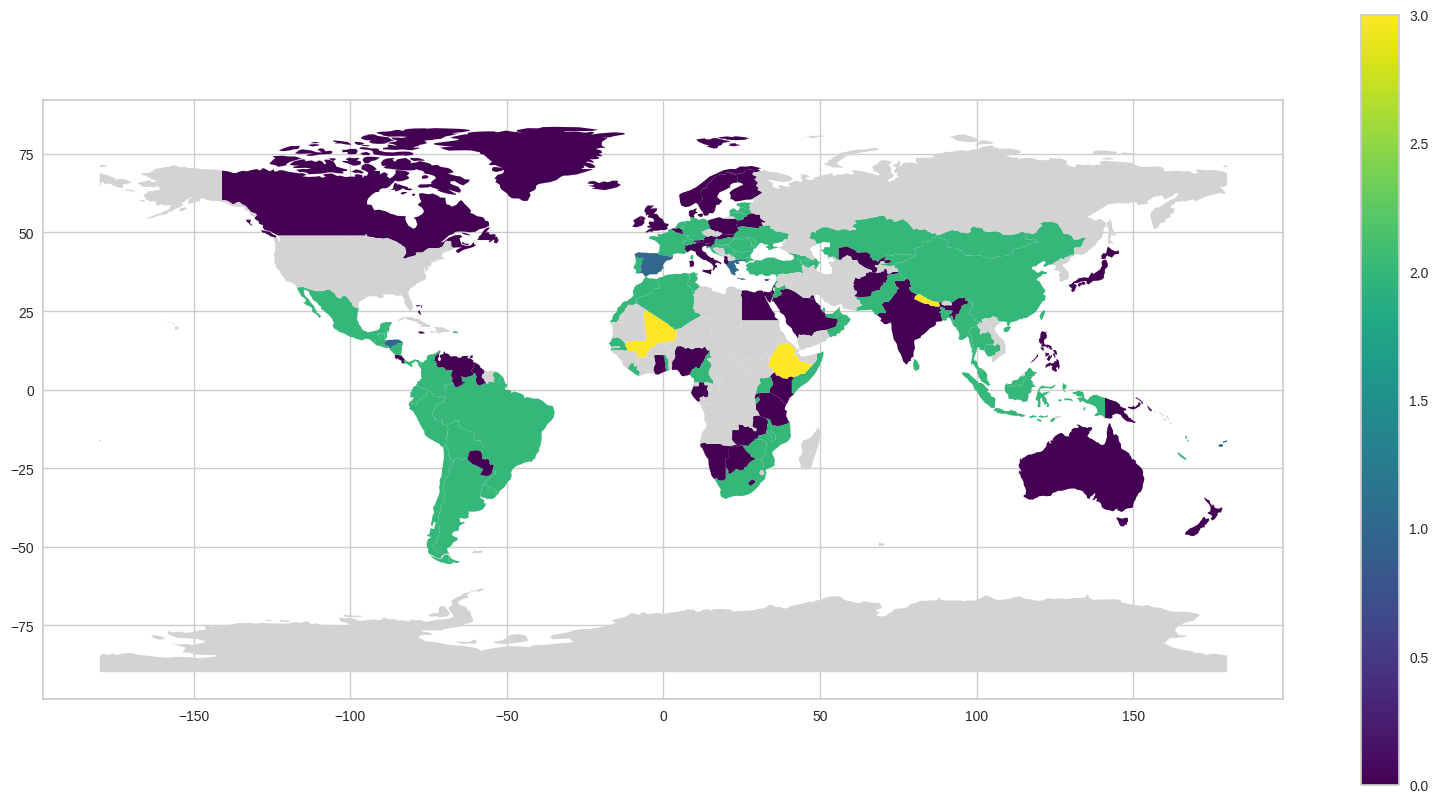

In [ ]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_clusters = final_merged_df.groupby('country')['cluster'].agg(lambda x:x.value_counts().index[0]).reset_index()

world_clusters = world.merge(country_clusters, how='left', left_on='name', right_on='country')

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
world_clusters.plot(column='cluster', ax=ax, legend=True, cmap='viridis', missing_kwds={'color': 'lightgrey'})

plt.show()

In [ ]:
final_merged_df_US = final_merged_df[final_merged_df['country'] == 'United States']

value_counts = final_merged_df_US.groupby('country')['cluster'].value_counts()
value_counts

country        cluster
United States  0          157549
               1          103586
               2           81335
               3           56527
Name: cluster, dtype: int64

In [ ]:
category_counts = final_merged_df.groupby('cluster')['country'].value_counts()

# Iterate over unique clusters
for cluster in final_merged_df['cluster'].unique():
    print(f"Cluster {cluster}:")
    print(category_counts[cluster].nlargest(7))
    print()

Cluster 0:
country
United States     157549
United Kingdom     44822
Germany            28334
Australia          19783
Canada             18538
Japan              12721
France             12089
Name: country, dtype: int64

Cluster 1:
country
United States     103586
United Kingdom     40548
Germany            18219
Australia          11838
France             10675
Canada              7883
Netherlands         3960
Name: country, dtype: int64

Cluster 2:
country
United States     81335
United Kingdom    41426
Germany           30211
Australia         16201
France            12442
Japan             11722
Canada             9799
Name: country, dtype: int64

Cluster 3:
country
United States     56527
United Kingdom    22327
Germany            9824
Australia          7939
Canada             6230
Japan              4344
France             4044
Name: country, dtype: int64



In [ ]:
for i in final_merged_df['cluster'].unique():
    print(f"Cluster {i}")
    print(final_merged_df[final_merged_df['cluster'] == i].corr())

Cluster 0
                 amount_paid_usd  price_USD  generous  isBCFriday  \
amount_paid_usd         1.000000   0.589735  0.208571         NaN   
price_USD               0.589735   1.000000 -0.150808         NaN   
generous                0.208571  -0.150808  1.000000         NaN   
isBCFriday                   NaN        NaN       NaN         NaN   
music_category         -0.021952  -0.004571 -0.048314         NaN   
cluster                      NaN        NaN       NaN         NaN   
country                      NaN        NaN       NaN         NaN   

                 music_category  cluster  country  
amount_paid_usd       -0.021952      NaN      NaN  
price_USD             -0.004571      NaN      NaN  
generous              -0.048314      NaN      NaN  
isBCFriday                  NaN      NaN      NaN  
music_category         1.000000      NaN      NaN  
cluster                     NaN      NaN      NaN  
country                     NaN      NaN      NaN  
Cluster 1
           

In [ ]:
final_merged_df.groupby('cluster')[['amount_paid_usd']].describe()

amount_paid_usd                                                   \
                  count       mean        std   min    25%    50%    75%   
cluster                                                                    
0              357920.0   7.226311   8.822206  0.29   3.33   6.40  10.00   
1              236506.0  19.719844  16.377701  0.58  11.72  17.56  25.00   
2              271030.0   2.217951   6.021693  0.20   1.16   1.50   2.34   
3              134539.0   8.026203  10.195845  0.29   4.00   7.00  10.00   

                  
             max  
cluster           
0        1279.50  
1        1286.26  
2        1273.51  
3        1000.00

In [ ]:
final_merged_df.groupby('cluster')[['price_USD']].describe()

price_USD                                                              \
            count       mean        std  min        25%        50%        75%   
cluster                                                                         
0        357920.0   5.797296   5.883382  0.0   1.288867   5.451855   8.982956   
1        236506.0  19.157229  14.027897  0.0  11.549515  16.660000  24.000000   
2        271030.0   1.674909   1.888014  0.0   1.000000   1.290000   2.000000   
3        134539.0   6.660559   7.945224  0.0   2.587319   6.413947   9.483200   

                      
                 max  
cluster               
0        1000.000000  
1         956.500746  
2         550.000000  
3         959.419626

In [ ]:
mean_usd_df = final_merged_df.groupby('cluster')[['amount_paid_usd', 'price_USD']].mean()
mean_usd_df['ratio'] = mean_usd_df['amount_paid_usd'] / mean_usd_df['price_USD']
mean_usd_df

amount_paid_usd  price_USD     ratio
cluster                                      
0               7.226311   5.797296  1.246497
1              19.719844  19.157229  1.029368
2               2.217951   1.674909  1.324222
3               8.026203   6.660559  1.205034

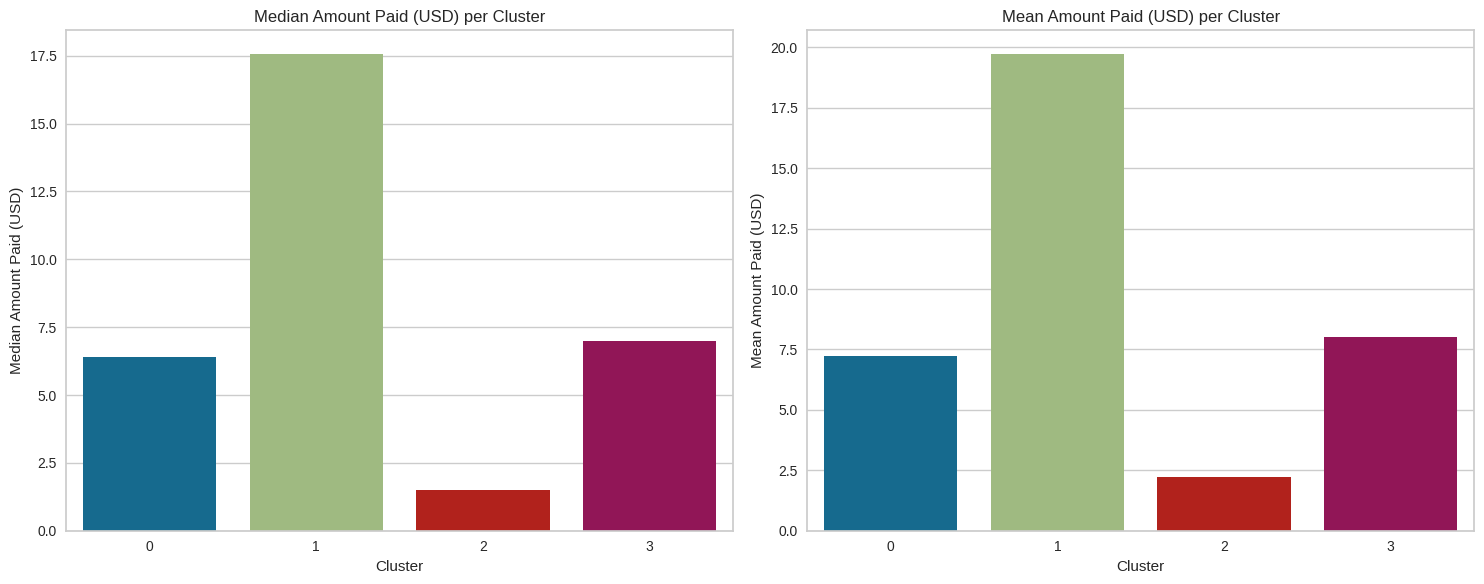

In [ ]:
medians_paid = final_merged_df.groupby('cluster')['amount_paid_usd'].median()
means_paid = final_merged_df.groupby('cluster')['amount_paid_usd'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot
sns.barplot(x=medians_paid.index, y=medians_paid.values, ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Median Amount Paid (USD)')
axes[0].set_title('Median Amount Paid (USD) per Cluster')

# Plot Mean
sns.barplot(x=means_paid.index, y=means_paid.values, ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Mean Amount Paid (USD)')
axes[1].set_title('Mean Amount Paid (USD) per Cluster')

plt.tight_layout()
plt.show()

In [ ]:
final_merged_df.describe()

amount_paid_usd      price_USD       generous     isBCFriday  \
count    999995.000000  999995.000000  999995.000000  999995.000000   
mean          8.931316       7.955863       0.119134       0.271230   
std          12.490106      10.518978       0.323946       0.444595   
min           0.200000       0.000000       0.000000       0.000000   
25%           2.000000       1.288209       0.000000       0.000000   
50%           6.000000       5.077116       0.000000       0.000000   
75%          11.630000      10.000000       0.000000       1.000000   
max        1286.260000    1000.000000       1.000000       1.000000   

             cluster              a              b              p  \
count  999995.000000  999995.000000  999995.000000  999995.000000   
mean        1.182189       0.481583       0.011584       0.235816   
std         1.064857       0.499661       0.107004       0.424508   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         2.000000       1.000000       0.000000       0.000000   
max         3.000000       1.000000       1.000000       1.000000   

                   t  
count  999995.000000  
mean        0.271016  
std         0.444485  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [ ]:
dummies = pd.get_dummies(final_merged_df['item_type'])
final_merged_df = pd.concat([final_merged_df, dummies], axis=1)
final_merged_df

item_type country_code  amount_paid_usd  price_USD  generous  \
0              a           gb             9.99   9.990000         0   
1              a           fi             1.30   1.290715         0   
2              a           fi             3.90   3.872145         0   
3              p           gb            12.39  12.361650         0   
4              t           us             1.00   1.000000         0   
...          ...          ...              ...        ...       ...   
999995         p           ca            20.00  20.000000         0   
999996         a           us            20.20  20.200001         0   
999997         a           au             1.00   0.000000         0   
999998         p           us             6.00   6.000000         0   
999999         p           gb            38.59  38.809789         0   

        isBCFriday  music_category  cluster  country  a  b  p  t  
0                0             3.0        0      NaN  1  0  0  0  
1                0             3.0        0      NaN  1  0  0  0  
2                0             3.0        0      NaN  1  0  0  0  
3                0             3.0        1      NaN  0  0  1  0  
4                0             4.0        2      NaN  0  0  0  1  
...            ...             ...      ...      ... .. .. .. ..  
999995           1             3.0        1      NaN  0  0  1  0  
999996           1             3.0        3      NaN  1  0  0  0  
999997           1             5.0        3      NaN  1  0  0  0  
999998           1             3.0        1      NaN  0  0  1  0  
999999           1            11.0        1      NaN  0  0  1  0  

[999995 rows x 13 columns]

In [ ]:
final_merged_df.groupby('cluster')[['generous', 'isBCFriday', 'a', 'b', 'p', 't']].mean()


generous  isBCFriday         a         b         p         t
cluster                                                              
0        0.173667    0.000000  0.977188  0.022812  0.000000  0.000000
1        0.080573    0.322102  0.000000  0.002922  0.997078  0.000000
2        0.053677    0.223263  0.000000  0.000055  0.000000  0.999945
3        0.173704    1.000000  0.979835  0.020165  0.000000  0.000000

In [ ]:
counts_df = pd.DataFrame()

for column in ['generous', 'isBCFriday', 'a', 'b', 'p', 't']:
    counts = final_merged_df.groupby('cluster')[column].value_counts().unstack()
    counts.columns = [f'{column}_{x}' for x in counts.columns]
    counts_df = pd.concat([counts_df, counts], axis=1)

counts_df

generous_0  generous_1  isBCFriday_0  isBCFriday_1       a_0  \
cluster                                                                 
0            295761       62159      357920.0           NaN    8165.0   
1            217450       19056      160327.0       76179.0  236506.0   
2            256482       14548      210519.0       60511.0  271030.0   
3            111169       23370           NaN      134539.0    2713.0   

              a_1     b_0   b_1       p_0       p_1       t_0       t_1  
cluster                                                                  
0        349755.0  349755  8165  357920.0       NaN  357920.0       NaN  
1             NaN  235815   691     691.0  235815.0  236506.0       NaN  
2             NaN  271015    15  271030.0       NaN      15.0  271015.0  
3        131826.0  131826  2713  134539.0       NaN  134539.0       NaN

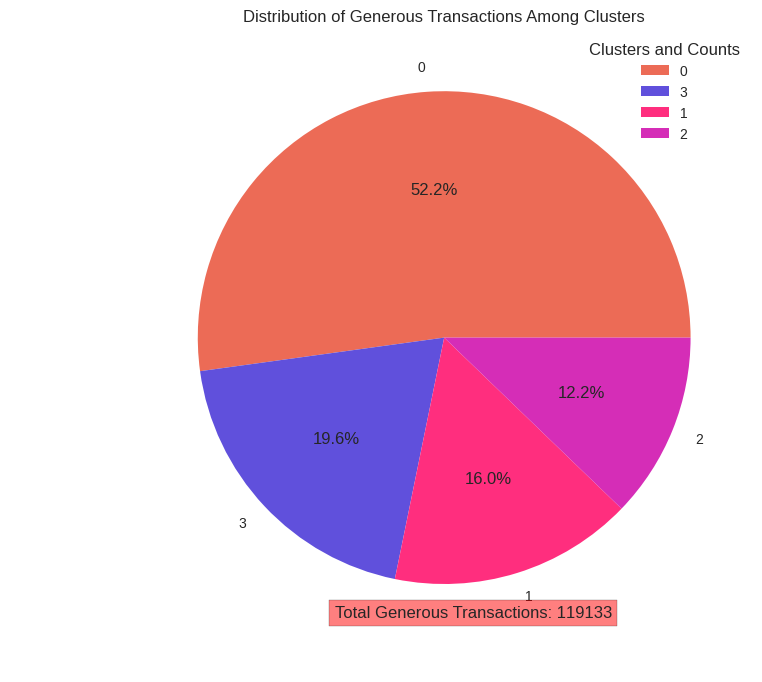

In [ ]:
colors = ['#EC6B56', '#6050DC', '#FF2E7E', '#D52DB7']
color_dict = {0: '#EC6B56', 1: '#6050DC', 2: '#FF2E7E', 3: '#D52DB7'}


generous_counts = final_merged_df[final_merged_df['generous'] == 1]['cluster'].value_counts()
total_generous = generous_counts.sum()


# Generate pie chart
plt.figure(figsize=(15, 8))
sorted_counts = generous_counts.sort_index()
plt.pie(generous_counts, labels=generous_counts.index, autopct='%1.1f%%', colors = colors)
plt.title('Distribution of Generous Transactions Among Clusters')
plt.legend(title="Clusters and Counts", loc="upper right")
plt.text(0.18, -0.21, f'Total Generous Transactions: {total_generous}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))

plt.show()

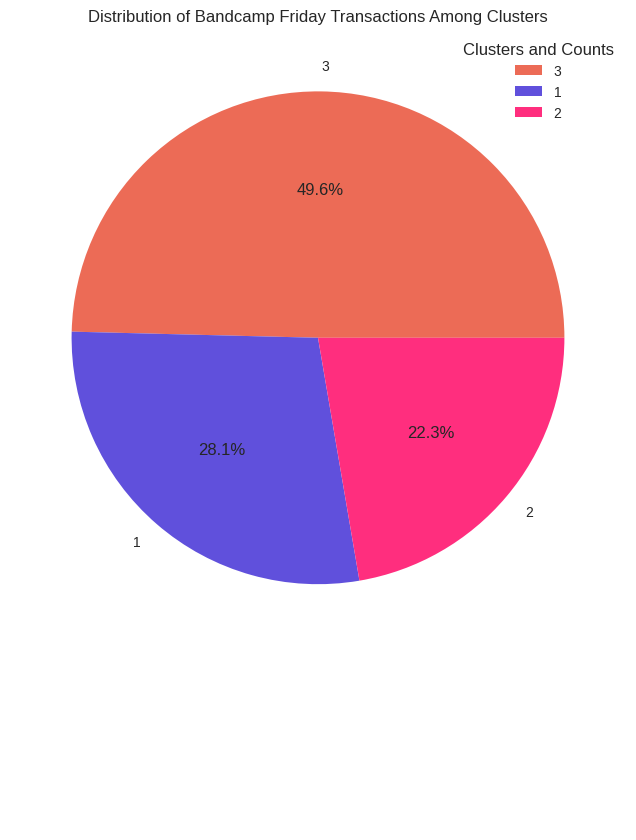

In [ ]:
BCFriday_counts = final_merged_df[final_merged_df['isBCFriday'] == 1]['cluster'].value_counts()
total_BCFriday_counts = BCFriday_counts.sum()


# Generate pie chart
plt.figure(figsize=(15, 8))
sorted_counts = generous_counts.sort_index()
plt.pie(BCFriday_counts, labels=BCFriday_counts.index, autopct='%1.1f%%', colors = colors)
plt.title('Distribution of Bandcamp Friday Transactions Among Clusters')
plt.legend(title="Clusters and Counts", loc="upper right")
plt.text(0.18, -0.21, f'Total Bandcamp Friday Transactions: {total_BCFriday_counts}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))

plt.show()

In [ ]:
BCFriday_df = final_merged_df_noTagless[final_merged_df_noTagless['isBCFriday'] == 1]

# Calculate distribution of generous transactions for each cluster
generous_distributions = BCFriday_df.groupby('cluster')['generous'].value_counts()

generous_distributions

cluster  generous
1        0           32291
         1            2440
2        0           29713
         1            2085
3        0           59835
         1           12519
Name: generous, dtype: int64

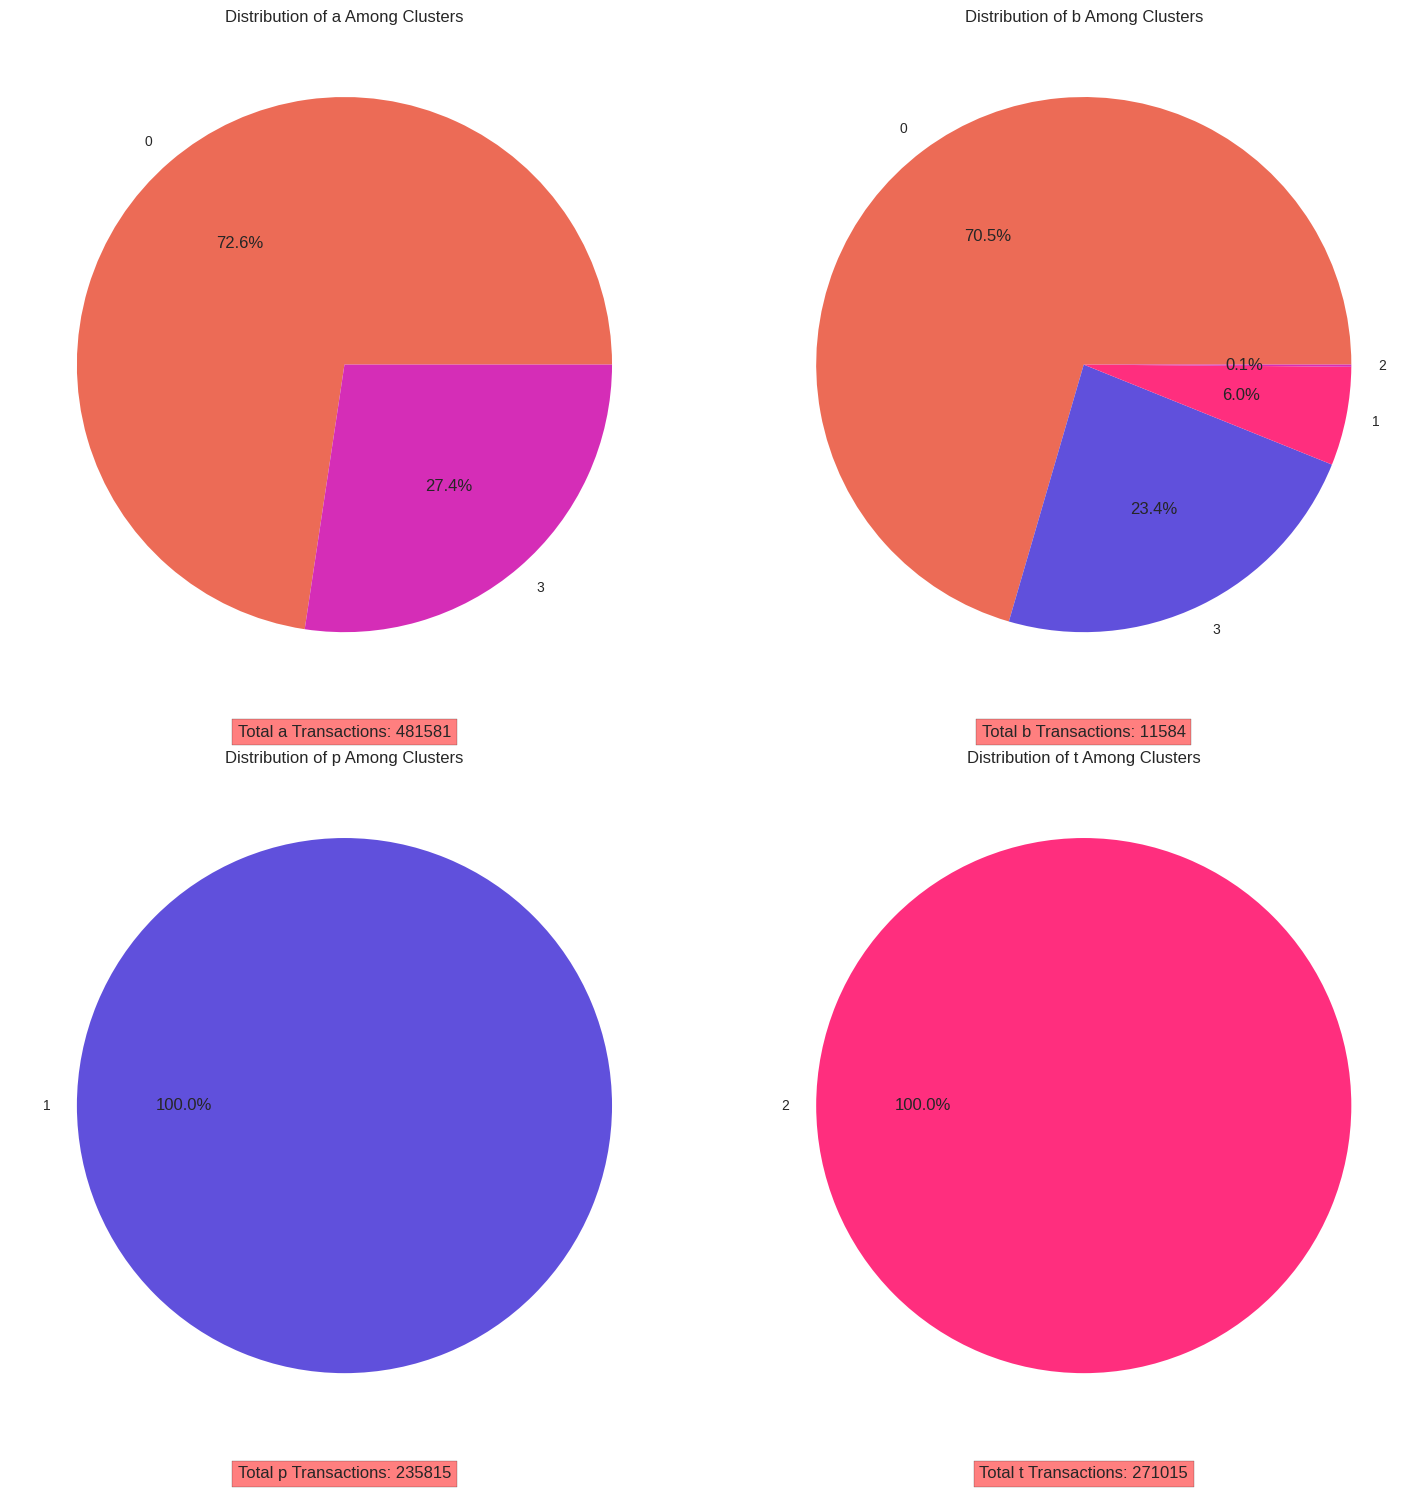

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

item_types = {'a': None, 'b': None, 'p': None, 't': None}

for item_type in item_types.keys():
    item_type_counts = final_merged_df[final_merged_df[item_type] == 1]['cluster'].value_counts()
    total_item_type_counts = item_type_counts.sum()
    item_types[item_type] = (item_type_counts, total_item_type_counts)

ax1, ax2, ax3, ax4 = axs.flatten()

axes = [ax1, ax2, ax3, ax4]
for ax, (item_type, (item_type_counts, total_item_type_counts)) in zip(axes, item_types.items()):
    sorted_counts = item_type_counts.sort_index()
    colors = [color_dict[i] for i in sorted_counts.index]
    ax.pie(item_type_counts, labels=item_type_counts.index, autopct='%1.1f%%', colors = colors)
    ax.set_title(f'Distribution of {item_type} Among Clusters')
    ax.text(0.5, -0.05, f'Total {item_type} Transactions: {total_item_type_counts}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()
plt.show()